- **Quantium Virtual Internship- Retail Strategy and
 Analytics- Task 1**

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [ ]:
# Loading the datasets
transaction_path = r"C:\Users\user\Desktop\#\portpolio projects\python\Retail Analytics\task_one\QVI_transaction_data.xlsx"
behaviour_path = r"C:\Users\user\Desktop\#\portpolio projects\python\Retail Analytics\task_one\QVI_purchase_behaviour.csv"

# Reading the transaction data (Excel)
transaction_data = pd.read_excel(transaction_path)

# Reading the customer behaviour data (CSV)
purchase_behaviour = pd.read_csv(behaviour_path)

# Previewing both datasets
print("Transaction Data:")
print(transaction_data.head(), "\n")

print("Purchase Behaviour Data:")
print(purchase_behaviour.head())

Transaction Data:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

Purchase Behaviour Data:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG 

In [3]:
# Standardizing column names (remove spaces, make lowercase)
transaction_data.columns = transaction_data.columns.str.strip().str.upper()
purchase_behaviour.columns = purchase_behaviour.columns.str.strip().str.upper()

# Check for missing values
print("Missing values in transaction data:\n", transaction_data.isnull().sum())
print("\nMissing values in behaviour data:\n", purchase_behaviour.isnull().sum())

# Check for duplicates
print("\nDuplicate rows in transaction data:", transaction_data.duplicated().sum())
print("Duplicate rows in behaviour data:", purchase_behaviour.duplicated().sum())


Missing values in transaction data:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Missing values in behaviour data:
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Duplicate rows in transaction data: 1
Duplicate rows in behaviour data: 0


In [22]:
# Drop the duplicate row
transaction_data = transaction_data.drop_duplicates()

# Confirm removal
print("Duplicate rows after cleaning:", transaction_data.duplicated().sum())


Duplicate rows after cleaning: 0


In [23]:
#  merging on LYLTY_CARD_NBR
merged_df = pd.merge(transaction_data, purchase_behaviour, how='left', on='LYLTY_CARD_NBR')

# Confirm the merge
print("Merged Data Shape:", merged_df.shape)
print("Sample of merged data:\n", merged_df.head())

Merged Data Shape: (264835, 10)
Sample of merged data:
     DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SI

In [24]:
# Checking for missing values in the merged dataset
missing_report = merged_df.isnull().sum()
missing_report = missing_report[missing_report > 0]
print("Columns with missing values:\n", missing_report)


Columns with missing values:
 Series([], dtype: int64)


In [25]:
merged_df.head()
# Saving the merged dataset to a new Excel file

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [26]:
merged_df['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264830     Kettle Sweet Chilli And Sour Cream 175g
264831               Tostitos Splash Of  Lime 175g
264832                    Doritos Mexicana    170g
264833     Doritos Corn Chip Mexican Jalapeno 150g
264834               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264835, dtype: object

In [27]:
# Breaking down product name into brand, flavour, and pack size
merged_df[['brand', 'flavour', 'pack_size']] = merged_df['PROD_NAME'].str.rsplit(' ', n=2, expand=True)


In [28]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,brand,flavour,pack_size
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip,Compny,SeaSalt175g
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese,,175g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips,Chicken,170g
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths Chip Thinly,S/Cream&Onion,175g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsHny&Jlpno,Chili,150g


In [29]:
merged_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'brand', 'flavour', 'pack_size'],
      dtype='object')

#### 🔀 Rearranging Columns for Logical Flow


In [30]:
# Renaming columns
merged_df.rename(columns={
    'DATE': 'transaction_date',
    'STORE_NBR': 'store_number',
    'LYLTY_CARD_NBR': 'customer_id',
    'TXN_ID': 'transaction_id',
    'PROD_NBR': 'product_id',
    'PROD_NAME': 'product_name',
    'PROD_QTY': 'quantity',
    'TOT_SALES': 'total_sales',
    'LIFESTAGE': 'lifestage',
    'PREMIUM_CUSTOMER': 'premium_customer',
    'pack_size': 'pack_size_grams'
}, inplace=True)

# Reordering columns
merged_df = merged_df[[
    'transaction_date',
    'transaction_id',
    'customer_id',
    'store_number',
    'product_id',
    'product_name',
    'brand',
    'flavour',
    'pack_size_grams',
    'quantity',
    'total_sales',
    'lifestage',
    'premium_customer'
]]

# Preview to confirm
print(merged_df.head())


   transaction_date  transaction_id  customer_id  store_number  product_id  \
0             43390               1         1000             1           5   
1             43599             348         1307             1          66   
2             43605             383         1343             1          61   
3             43329             974         2373             2          69   
4             43330            1038         2426             2         108   

                               product_name                          brand  \
0    Natural Chip        Compny SeaSalt175g            Natural Chip          
1                  CCs Nacho Cheese    175g             CCs Nacho Cheese     
2    Smiths Crinkle Cut  Chips Chicken 170g      Smiths Crinkle Cut  Chips   
3    Smiths Chip Thinly  S/Cream&Onion 175g            Smiths Chip Thinly    
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g  Kettle Tortilla ChpsHny&Jlpno   

         flavour pack_size_grams  quantity  total_sales  \
0  

In [13]:
merged_df.head()

,transaction_date,transaction_id,customer_id,store_number,product_id,product_name,brand,flavour,pack_size_grams,quantity,total_sales,lifestage,premium_customer
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,Natural Chip,Compny,SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,348,1307,1,66,CCs Nacho Cheese 175g,CCs Nacho Cheese,,175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,383,1343,1,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths Crinkle Cut Chips,Chicken,170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,974,2373,2,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths Chip Thinly,S/Cream&Onion,175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,1038,2426,2,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle Tortilla ChpsHny&Jlpno,Chili,150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [31]:
merged_df['premium_customer'].unique()

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

In [32]:
# Renaming for semantic clarity
merged_df.rename(columns={'premium_customer': 'customer_type'}, inplace=True)


In [40]:
merged_df.head()

,transaction_date,transaction_id,customer_id,store_number,product_id,product_name,brand,flavour,pack_size_grams,quantity,total_sales,lifestage,customer_type
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,Natural Chip,Compny,SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,348,1307,1,66,CCs Nacho Cheese 175g,CCs Nacho Cheese,,175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,383,1343,1,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths Crinkle Cut Chips,Chicken,170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,974,2373,2,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths Chip Thinly,S/Cream&Onion,175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,1038,2426,2,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle Tortilla ChpsHny&Jlpno,Chili,150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [36]:
merged_df['lifestage'].unique()

array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES',
       'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES',
       'YOUNG FAMILIES'], dtype=object)

In [ ]:
# Converting 'lifestage' values to title case for professionalism and clarity
merged_df['lifestage'] = merged_df['lifestage'].str.title().str.strip()



In [56]:
merged_df['lifestage'].unique()

array(['Young Singles/Couples', 'Midage Singles/Couples', 'New Families',
       'Older Families', 'Older Singles/Couples', 'Retirees',
       'Young Families'], dtype=object)

In [55]:
merged_df.head()

,transaction_date,transaction_id,customer_id,store_number,product_id,product_name,brand,flavour,pack_size_grams,quantity,total_sales,lifestage,customer_type
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,Natural Chip,Compny,175.0,2,6.0,Young Singles/Couples,Premium
1,43599,348,1307,1,66,CCs Nacho Cheese 175g,CCs Nacho Cheese,,175.0,3,6.3,Midage Singles/Couples,Budget
2,43605,383,1343,1,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths Crinkle Cut Chips,Chicken,170.0,2,2.9,Midage Singles/Couples,Budget
3,43329,974,2373,2,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths Chip Thinly,S/Cream&Onion,175.0,5,15.0,Midage Singles/Couples,Budget
4,43330,1038,2426,2,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle Tortilla ChpsHny&Jlpno,Chili,150.0,3,13.8,Midage Singles/Couples,Budget


In [41]:
# Extracting pack size as numeric grams from product_name
merged_df['pack_size_grams'] = merged_df['product_name'].str.extract(r'(\d+)[Gg]').astype(float)


In [42]:
merged_df.head()

,transaction_date,transaction_id,customer_id,store_number,product_id,product_name,brand,flavour,pack_size_grams,quantity,total_sales,lifestage,customer_type
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,Natural Chip,Compny,175.0,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,348,1307,1,66,CCs Nacho Cheese 175g,CCs Nacho Cheese,,175.0,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,383,1343,1,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths Crinkle Cut Chips,Chicken,170.0,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,974,2373,2,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths Chip Thinly,S/Cream&Onion,175.0,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,1038,2426,2,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle Tortilla ChpsHny&Jlpno,Chili,150.0,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [52]:
# Inspect unextracted rows
unmatched_pack_sizes = merged_df[merged_df['pack_size_grams'].isna()]
print(unmatched_pack_sizes[['product_name']].drop_duplicates())


Empty DataFrame
Columns: [product_name]
Index: []


In [53]:
merged_df.head()

,transaction_date,transaction_id,customer_id,store_number,product_id,product_name,brand,flavour,pack_size_grams,quantity,total_sales,lifestage,customer_type
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,Natural Chip,Compny,175.0,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,348,1307,1,66,CCs Nacho Cheese 175g,CCs Nacho Cheese,,175.0,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,383,1343,1,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths Crinkle Cut Chips,Chicken,170.0,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,974,2373,2,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths Chip Thinly,S/Cream&Onion,175.0,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,1038,2426,2,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle Tortilla ChpsHny&Jlpno,Chili,150.0,3,13.8,MIDAGE SINGLES/COUPLES,Budget


##### ✅ Full Column Format Optimization


In [57]:
# Converting 'transaction_date' to datetime format
merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'])

# Ensuring ID fields are treated as string (not integers, to preserve leading zeros)
merged_df['transaction_id'] = merged_df['transaction_id'].astype(str)
merged_df['customer_id'] = merged_df['customer_id'].astype(str)
merged_df['store_number'] = merged_df['store_number'].astype(str)
merged_df['product_id'] = merged_df['product_id'].astype(str)

# Standardizing text fields to Title Case and stripping whitespaces
merged_df['product_name'] = merged_df['product_name'].str.strip().str.title()
merged_df['brand'] = merged_df['brand'].str.strip().str.title()
merged_df['flavour'] = merged_df['flavour'].str.strip().str.title()
merged_df['lifestage'] = merged_df['lifestage'].str.strip().str.title()
merged_df['customer_type'] = merged_df['customer_type'].str.strip().str.title()

# Making sure pack size and sales figures are numeric
merged_df['pack_size_grams'] = pd.to_numeric(merged_df['pack_size_grams'], errors='coerce')
merged_df['quantity'] = pd.to_numeric(merged_df['quantity'], errors='coerce')
merged_df['total_sales'] = pd.to_numeric(merged_df['total_sales'], errors='coerce')


In [58]:
merged_df.dtypes

transaction_date    datetime64[ns]
transaction_id              object
customer_id                 object
store_number                object
product_id                  object
product_name                object
brand                       object
flavour                     object
pack_size_grams            float64
quantity                     int64
total_sales                float64
lifestage                   object
customer_type               object
dtype: object

In [62]:
# Convert the timestamp in nanoseconds to integer days
merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'].astype('int64'), origin='unix', unit='ns')


In [64]:
# Try coercing the column if the above fails
merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'], errors='coerce')


In [67]:
# Re-loading the original Excel data with transaction_date NOT parsed as datetime
transaction_df = pd.read_excel(
    r"C:\Users\user\Desktop\#\portpolio projects\python\Retail Analytics\task_one\QVI_transaction_data.xlsx",
    dtype={'DATE': 'int64'}  # Make sure DATE column stays as integer
)


In [68]:
# Converting Excel serial date (e.g. 43390) to datetime
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], origin='1899-12-30', unit='D')


In [69]:
# Replace the broken transaction_date in merged_df
merged_df['transaction_date'] = pd.to_datetime(transaction_df['DATE'])


In [70]:
print(merged_df['transaction_date'].min(), merged_df['transaction_date'].max())
print(merged_df['transaction_date'].dt.year.unique())


2018-07-01 00:00:00 2019-06-30 00:00:00
[2018 2019]


In [71]:
merged_df.head()

,transaction_date,transaction_id,customer_id,store_number,product_id,product_name,brand,flavour,pack_size_grams,quantity,total_sales,lifestage,customer_type
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt175G,Natural Chip,Compny,175.0,2,6.0,Young Singles/Couples,Premium
1,2019-05-14,348,1307,1,66,Ccs Nacho Cheese 175G,Ccs Nacho Cheese,,175.0,3,6.3,Midage Singles/Couples,Budget
2,2019-05-20,383,1343,1,61,Smiths Crinkle Cut Chips Chicken 170G,Smiths Crinkle Cut Chips,Chicken,170.0,2,2.9,Midage Singles/Couples,Budget
3,2018-08-17,974,2373,2,69,Smiths Chip Thinly S/Cream&Onion 175G,Smiths Chip Thinly,S/Cream&Onion,175.0,5,15.0,Midage Singles/Couples,Budget
4,2018-08-18,1038,2426,2,108,Kettle Tortilla Chpshny&Jlpno Chili 150G,Kettle Tortilla Chpshny&Jlpno,Chili,150.0,3,13.8,Midage Singles/Couples,Budget


In [66]:
print(merged_df['transaction_date'].head())
print(merged_df['transaction_date'].describe())


0   1970-01-01 00:00:00.000043390
1   1970-01-01 00:00:00.000043599
2   1970-01-01 00:00:00.000043605
3   1970-01-01 00:00:00.000043329
4   1970-01-01 00:00:00.000043330
Name: transaction_date, dtype: datetime64[ns]
count                           264835
mean     1970-01-01 00:00:00.000043464
min      1970-01-01 00:00:00.000043282
25%      1970-01-01 00:00:00.000043373
50%      1970-01-01 00:00:00.000043464
75%      1970-01-01 00:00:00.000043555
max      1970-01-01 00:00:00.000043646
Name: transaction_date, dtype: object


In [73]:
merged_df.head().count

<bound method DataFrame.count of   transaction_date transaction_id customer_id store_number product_id  \
0       2018-10-17              1        1000            1          5   
1       2019-05-14            348        1307            1         66   
2       2019-05-20            383        1343            1         61   
3       2018-08-17            974        2373            2         69   
4       2018-08-18           1038        2426            2        108   

                               product_name                          brand  \
0    Natural Chip        Compny Seasalt175G                   Natural Chip   
1                  Ccs Nacho Cheese    175G               Ccs Nacho Cheese   
2    Smiths Crinkle Cut  Chips Chicken 170G      Smiths Crinkle Cut  Chips   
3    Smiths Chip Thinly  S/Cream&Onion 175G             Smiths Chip Thinly   
4  Kettle Tortilla Chpshny&Jlpno Chili 150G  Kettle Tortilla Chpshny&Jlpno   

         flavour  pack_size_grams  quantity  total_sales  \

In [74]:
merged_df.info

<bound method DataFrame.info of        transaction_date transaction_id customer_id store_number product_id  \
0            2018-10-17              1        1000            1          5   
1            2019-05-14            348        1307            1         66   
2            2019-05-20            383        1343            1         61   
3            2018-08-17            974        2373            2         69   
4            2018-08-18           1038        2426            2        108   
...                 ...            ...         ...          ...        ...   
264830       2018-11-12         270088      272319          272         89   
264831       2019-03-09         270154      272358          272         74   
264832       2018-08-13         270187      272379          272         51   
264833       2018-11-06         270188      272379          272         42   
264834       2018-12-27         270189      272380          272         74   

                               

In [75]:
merged_df.corr

<bound method DataFrame.corr of        transaction_date transaction_id customer_id store_number product_id  \
0            2018-10-17              1        1000            1          5   
1            2019-05-14            348        1307            1         66   
2            2019-05-20            383        1343            1         61   
3            2018-08-17            974        2373            2         69   
4            2018-08-18           1038        2426            2        108   
...                 ...            ...         ...          ...        ...   
264830       2018-11-12         270088      272319          272         89   
264831       2019-03-09         270154      272358          272         74   
264832       2018-08-13         270187      272379          272         51   
264833       2018-11-06         270188      272379          272         42   
264834       2018-12-27         270189      272380          272         74   

                               

In [79]:
merged_df.count()

transaction_date    264835
transaction_id      264835
customer_id         264835
store_number        264835
product_id          264835
product_name        264835
brand               264835
flavour             264835
pack_size_grams     264835
quantity            264835
total_sales         264835
lifestage           264835
customer_type       264835
dtype: int64

## 1. Customer Segmentation Analysis  

### **Objective:**  
Analyze customer behavior across segments defined by:  
- **Lifestage**  
- **Customer_type**  
### **Key Metrics to Evaluate:**  
1. **Total Spend**  
   - Total monetary value of purchases  
2. **Purchase Volume**  
   - Total quantity of items purchased  
3. **Average Basket Size**  
   - Average transaction value  
4. **Transaction Frequency**  
   - Frequency of purchases over time  

In [84]:
merged_df.columns

Index(['transaction_date', 'transaction_id', 'customer_id', 'store_number',
       'product_id', 'product_name', 'brand', 'flavour', 'pack_size_grams',
       'quantity', 'total_sales', 'lifestage', 'customer_type'],
      dtype='object')

In [91]:
merged_df['customer_type'].unique()

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

In [92]:
merged_df['lifestage'].unique()

array(['Young Singles/Couples', 'Midage Singles/Couples', 'New Families',
       'Older Families', 'Older Singles/Couples', 'Retirees',
       'Young Families'], dtype=object)

In [93]:
# Jupyter optimized version
customer_segment_metrics = merged_df.groupby(['lifestage', 'customer_type']).agg(
    total_sales=('total_sales', 'sum'),
    total_quantity=('quantity', 'sum'),
    num_transactions=('transaction_id', 'nunique'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

# Calculate derived metrics
customer_segment_metrics['avg_sales_per_txn'] = (customer_segment_metrics['total_sales'] / customer_segment_metrics['num_transactions']).round(2)
customer_segment_metrics['avg_quantity_per_txn'] = (customer_segment_metrics['total_quantity'] / customer_segment_metrics['num_transactions']).round(2)

# Display with formatting
from IPython.display import display

display(
    customer_segment_metrics.sort_values('total_sales', ascending=False).head(10).style.format({
        'total_sales': '${:,.2f}',
        'avg_sales_per_txn': '${:,.2f}',
        'total_quantity': '{:,.0f}',
        'avg_quantity_per_txn': '{:,.2f}',
        'num_transactions': '{:,.0f}',
        'unique_customers': '{:,.0f}'
    })
)

,lifestage,customer_type,total_sales,total_quantity,num_transactions,unique_customers,avg_sales_per_txn,avg_quantity_per_txn
6,Older Families,Budget,"$168,363.25","45,065","22,935","4,675",$7.34,1.96
19,Young Singles/Couples,Mainstream,"$157,621.60","38,632","20,783","8,088",$7.58,1.86
13,Retirees,Mainstream,"$155,677.05","40,518","21,363","6,479",$7.29,1.90
15,Young Families,Budget,"$139,345.85","37,111","18,970","4,017",$7.35,1.96
9,Older Singles/Couples,Budget,"$136,769.80","35,220","18,301","4,929",$7.47,1.92
10,Older Singles/Couples,Mainstream,"$133,393.80","34,997","18,194","4,930",$7.33,1.92
11,Older Singles/Couples,Premium,"$132,257.15","33,984","17,654","4,750",$7.49,1.93
12,Retirees,Budget,"$113,147.80","28,764","15,113","4,454",$7.49,1.90
7,Older Families,Mainstream,"$103,445.55","27,756","14,113","2,831",$7.33,1.97
14,Retirees,Premium,"$97,646.05","24,884","13,036","3,872",$7.49,1.91


In [ ]:
# GOAL: Analyze spending patterns across all customer segments, 
#       with metrics sorted by highest spenders first

# 1. SETUP COMPLETE COMBINATIONS
# ------------------------------
# Get all possible lifestage + customer_type pairs
all_combinations = pd.MultiIndex.from_product(
    [merged_df['lifestage'].unique(), 
     merged_df['customer_type'].unique()],
    names=['lifestage', 'customer_type']
).to_frame(index=False)

# 2. CALCULATE METRICS
# --------------------
# Raw numbers first (no formatting yet)
metrics = all_combinations.merge(
    merged_df.groupby(['lifestage', 'customer_type']).agg(
        total_sales=('total_sales', 'sum'),
        total_quantity=('quantity', 'sum'),
        num_transactions=('transaction_id', 'nunique'),
        unique_customers=('customer_id', 'nunique')
    ).reset_index(),
    how='left'
).fillna(0)  # Show zeros for missing combinations

# 3. DERIVED METRICS
# ------------------
# With protection against empty segments
metrics['avg_sales_per_txn'] = np.where(
    metrics['num_transactions'] > 0,
    metrics['total_sales'] / metrics['num_transactions'],
    0
).round(2)

metrics['avg_quantity_per_txn'] = np.where(
    metrics['num_transactions'] > 0,
    metrics['total_quantity'] / metrics['num_transactions'],
    0
).round(2)

# 4. SORTING & FORMATTING
# -----------------------
# Sort by total_sales (highest to lowest)
final_output = (metrics
    .sort_values('total_sales', ascending=False)
    .style
    .format({
        'total_sales': '${:,.2f}',
        'avg_sales_per_txn': '${:,.2f}',
        'total_quantity': '{:,.0f}',
        'num_transactions': '{:,.0f}',
        'unique_customers': '{:,.0f}',
        'avg_quantity_per_txn': '{:,.2f}'
    })
    .set_caption("TOP PERFORMING SEGMENTS")
    .set_properties(**{'text-align': 'center'})
)

# 5. DISPLAY RESULTS
# ------------------
final_output  

,lifestage,customer_type,total_sales,total_quantity,num_transactions,unique_customers,avg_sales_per_txn,avg_quantity_per_txn
10,Older Families,Budget,"$168,363.25","45,065","22,935","4,675",$7.34,1.96
2,Young Singles/Couples,Mainstream,"$157,621.60","38,632","20,783","8,088",$7.58,1.86
17,Retirees,Mainstream,"$155,677.05","40,518","21,363","6,479",$7.29,1.90
19,Young Families,Budget,"$139,345.85","37,111","18,970","4,017",$7.35,1.96
13,Older Singles/Couples,Budget,"$136,769.80","35,220","18,301","4,929",$7.47,1.92
14,Older Singles/Couples,Mainstream,"$133,393.80","34,997","18,194","4,930",$7.33,1.92
12,Older Singles/Couples,Premium,"$132,257.15","33,984","17,654","4,750",$7.49,1.93
16,Retirees,Budget,"$113,147.80","28,764","15,113","4,454",$7.49,1.90
11,Older Families,Mainstream,"$103,445.55","27,756","14,113","2,831",$7.33,1.97
15,Retirees,Premium,"$97,646.05","24,884","13,036","3,872",$7.49,1.91


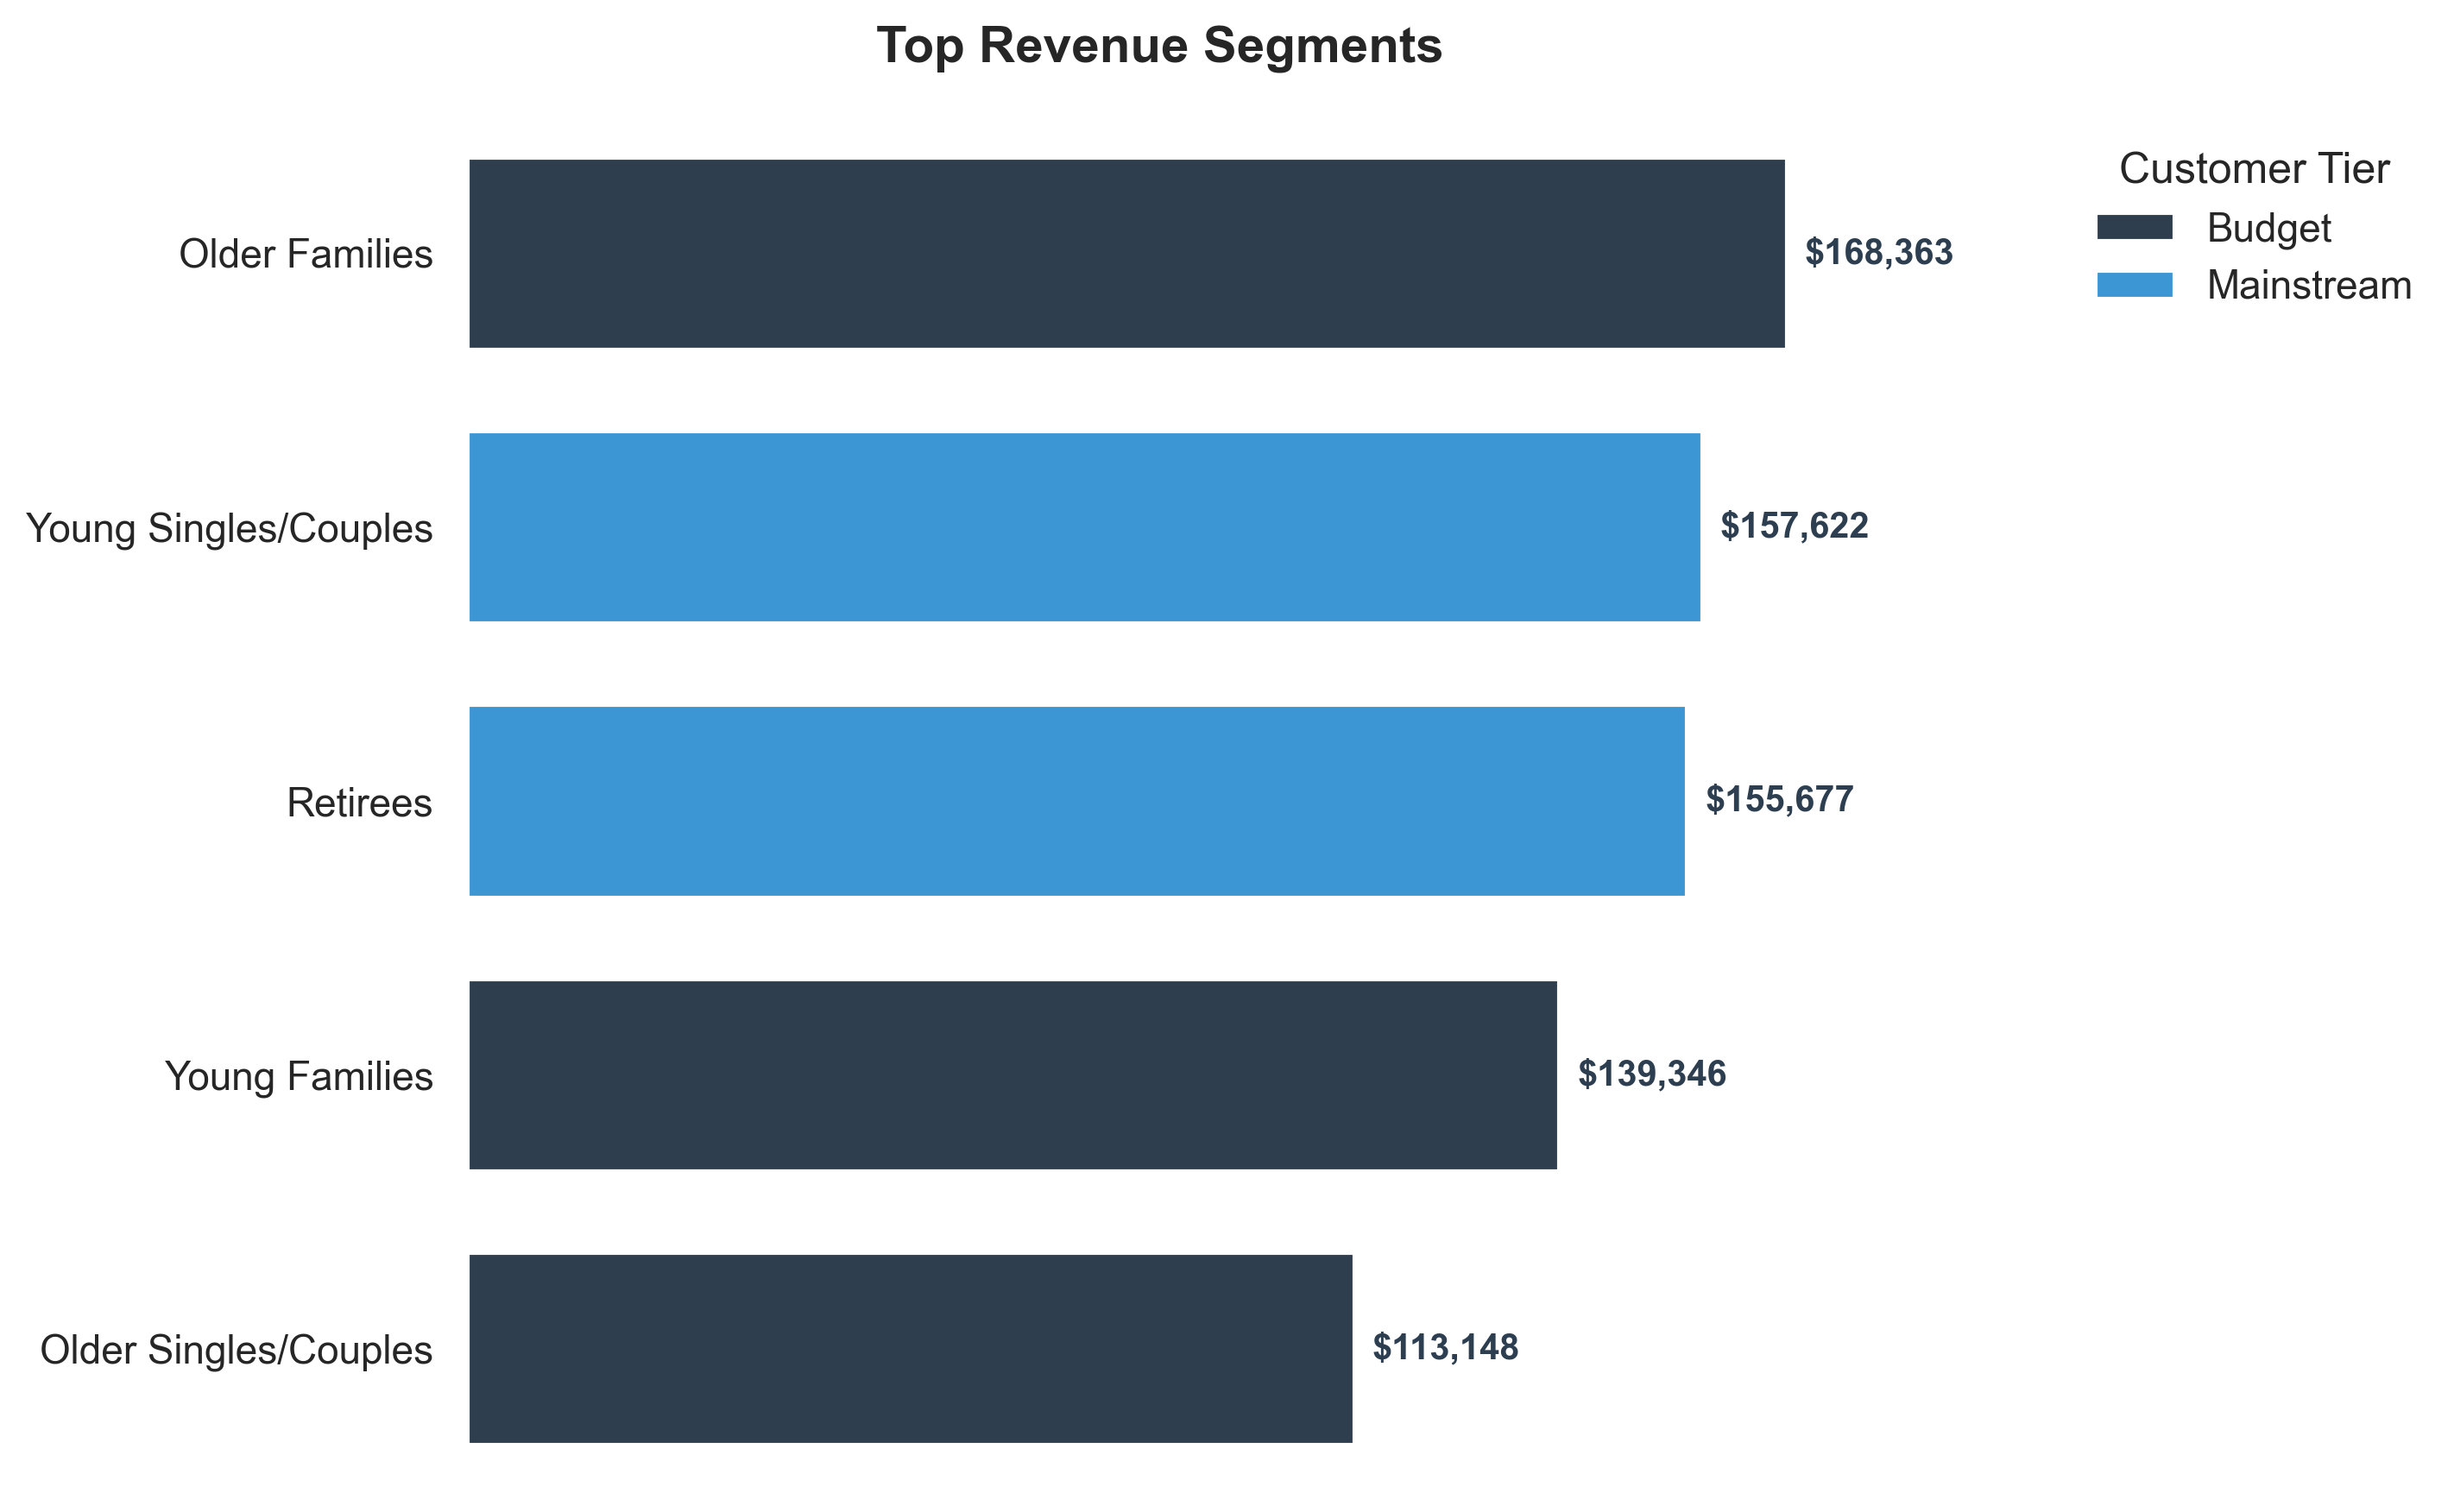

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set professional style (updated for modern matplotlib)
plt.style.use('default')  # Reset to default first
sns.set_theme(style="whitegrid")  # This is the correct seaborn style name

# Create the figure with better proportions
plt.figure(figsize=(10, 6), dpi=300)

# Sample data - REPLACE THIS WITH YOUR ACTUAL metrics_sorted DataFrame
data = {
    'lifestage': ['Older Families', 'Young Singles/Couples', 'Retirees', 
                 'Young Families', 'Older Singles/Couples'],
    'total_sales': [168363, 157622, 155677, 139346, 113148],
    'customer_type': ['Budget', 'Mainstream', 'Mainstream', 'Budget', 'Budget']
}
metrics_sorted = pd.DataFrame(data)

# Create the barplot with improved formatting
ax = sns.barplot(
    x='total_sales',
    y='lifestage',
    hue='customer_type',
    data=metrics_sorted,
    palette=['#2c3e50', '#3498db'],  # Reduced to 2 colors matching 2 customer types
    width=0.7,  # Optimal width
    saturation=0.9,
    dodge=False,
    err_kws={'linewidth': 0}  # Updated way to remove error bars
)

# Remove all spines and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove gridlines
ax.grid(False)

# Remove x-axis
ax.set_xticks([])
ax.set_xlabel('')

# Customize labels and titles
plt.title('Top Revenue Segments', fontsize=14, pad=15, fontweight='bold')
plt.ylabel('')
plt.legend(title='Customer Tier', frameon=False, bbox_to_anchor=(1.15, 1))

# Format value labels
for container in ax.containers:
    ax.bar_label(container, 
                labels=[f'${x:,.0f}' for x in container.datavalues],  # Proper formatting
                padding=5, 
                fontsize=10,
                fontweight='bold',
                color='#2c3e50')

# Adjust layout and save
plt.tight_layout()
plt.savefig('top_revenue_segments.png', bbox_inches='tight', dpi=300)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21752\2051369605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
C:\Users\user\AppData\Local\Temp\ipykernel_21752\2051369605.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Premium', 'Mainstream', 'Budget'], fontsize=10)


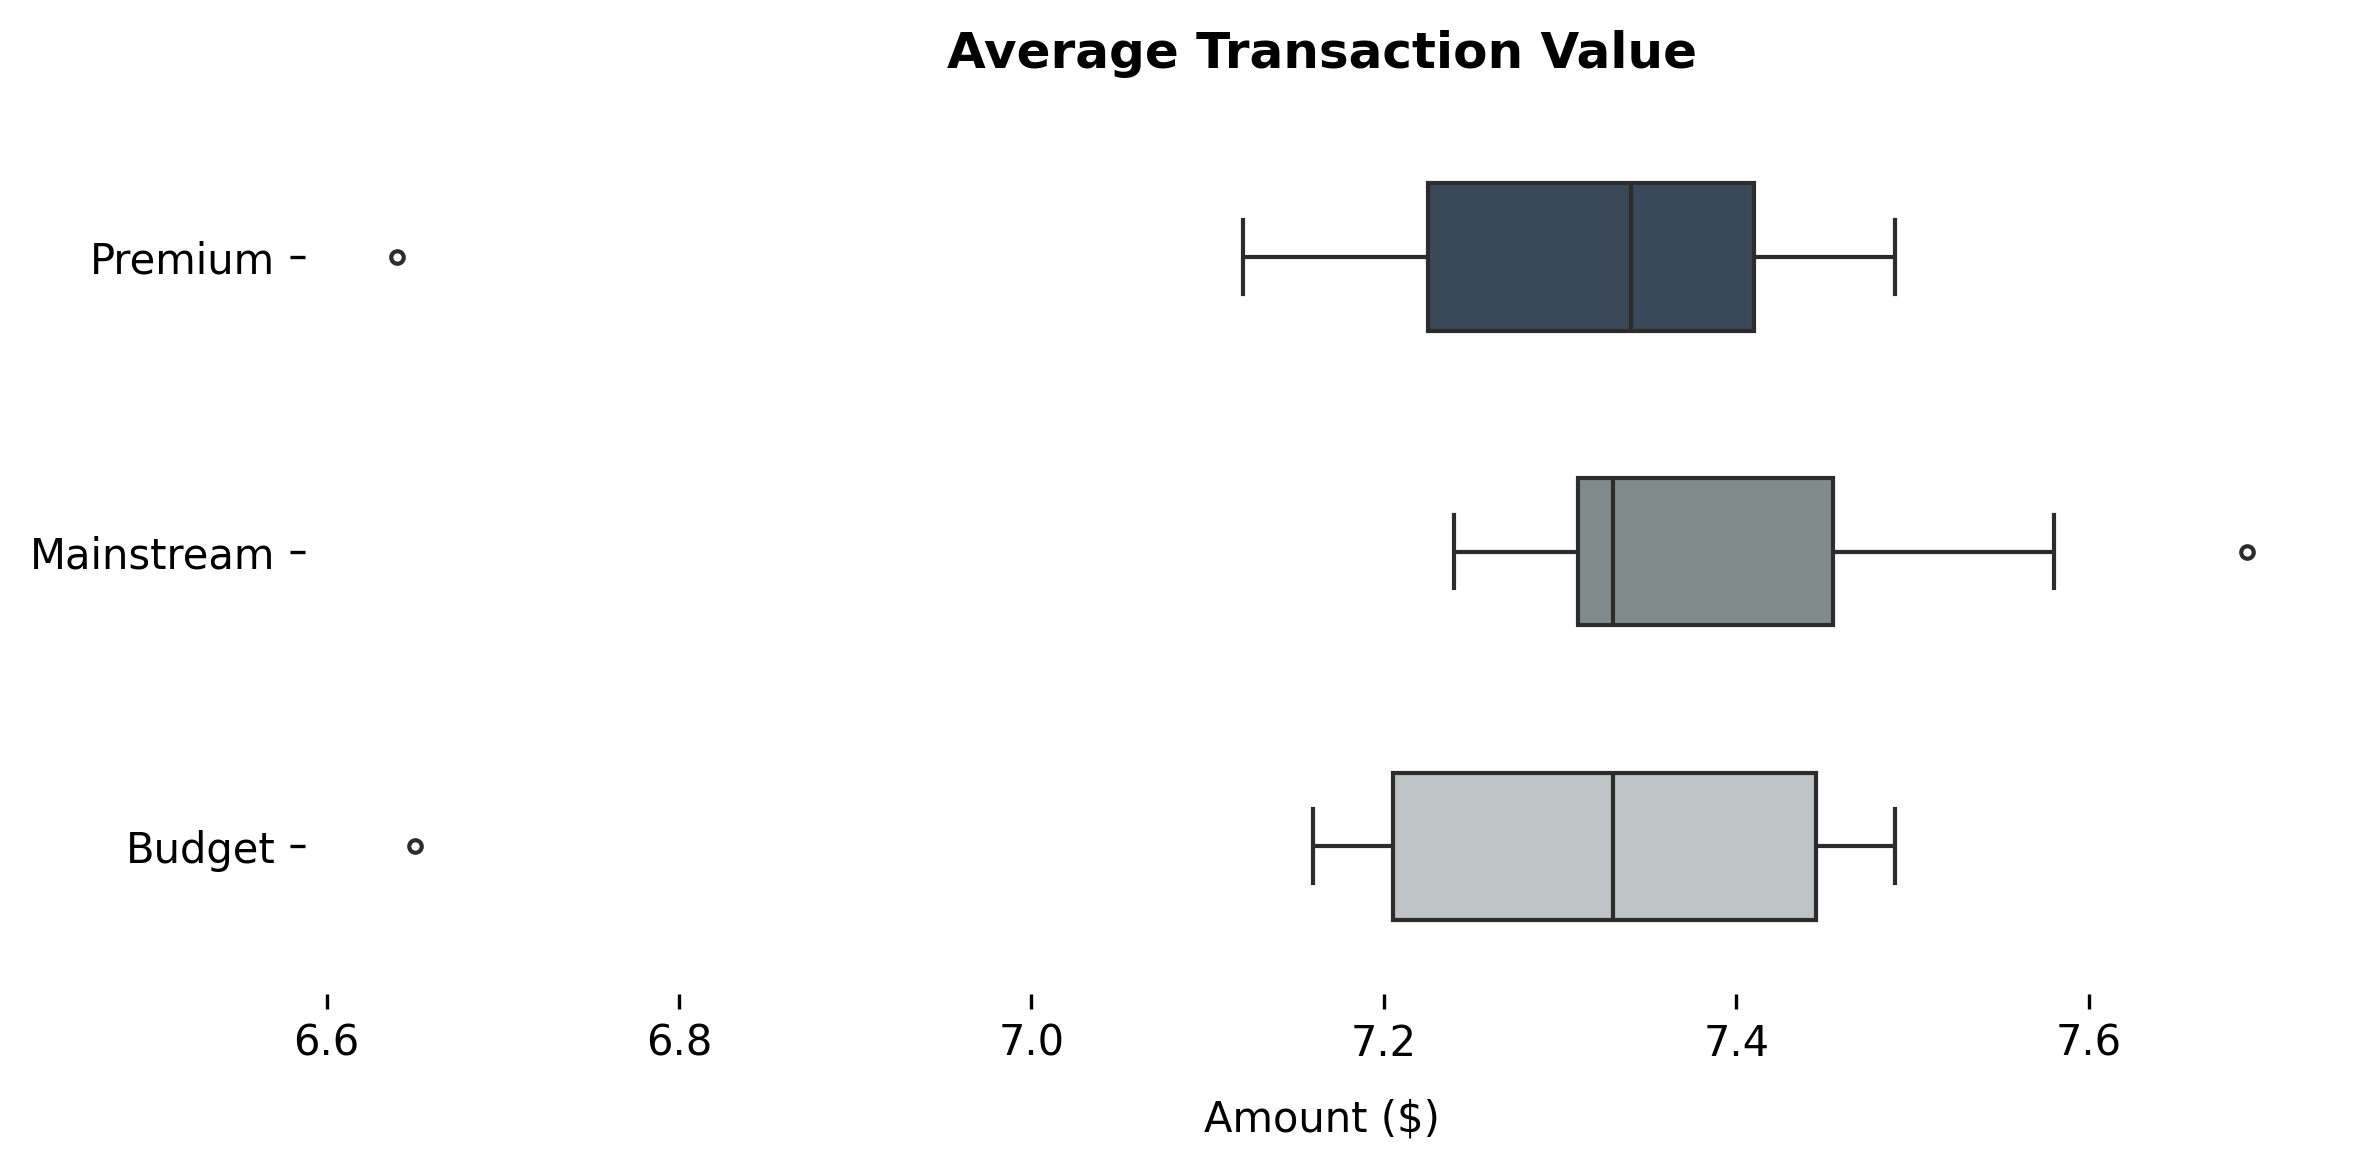

In [112]:
plt.figure(figsize=(8, 4), dpi=300)
ax = sns.boxplot(
    x='avg_sales_per_txn',
    y='customer_type',
    data=metrics_sorted,
    palette=['#34495e', '#7f8c8d', '#bdc3c7'],  # Monochromatic
    width=0.5,
    linewidth=1,
    fliersize=3
)

# Remove all spines and grids
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Clean annotations
plt.title('Average Transaction Value', fontsize=12, pad=10, fontweight='semibold')
plt.xlabel('Amount ($)', fontsize=10, labelpad=8)
plt.ylabel('')
ax.set_yticklabels(['Premium', 'Mainstream', 'Budget'], fontsize=10)

plt.tight_layout()
plt.savefig('basket_size_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

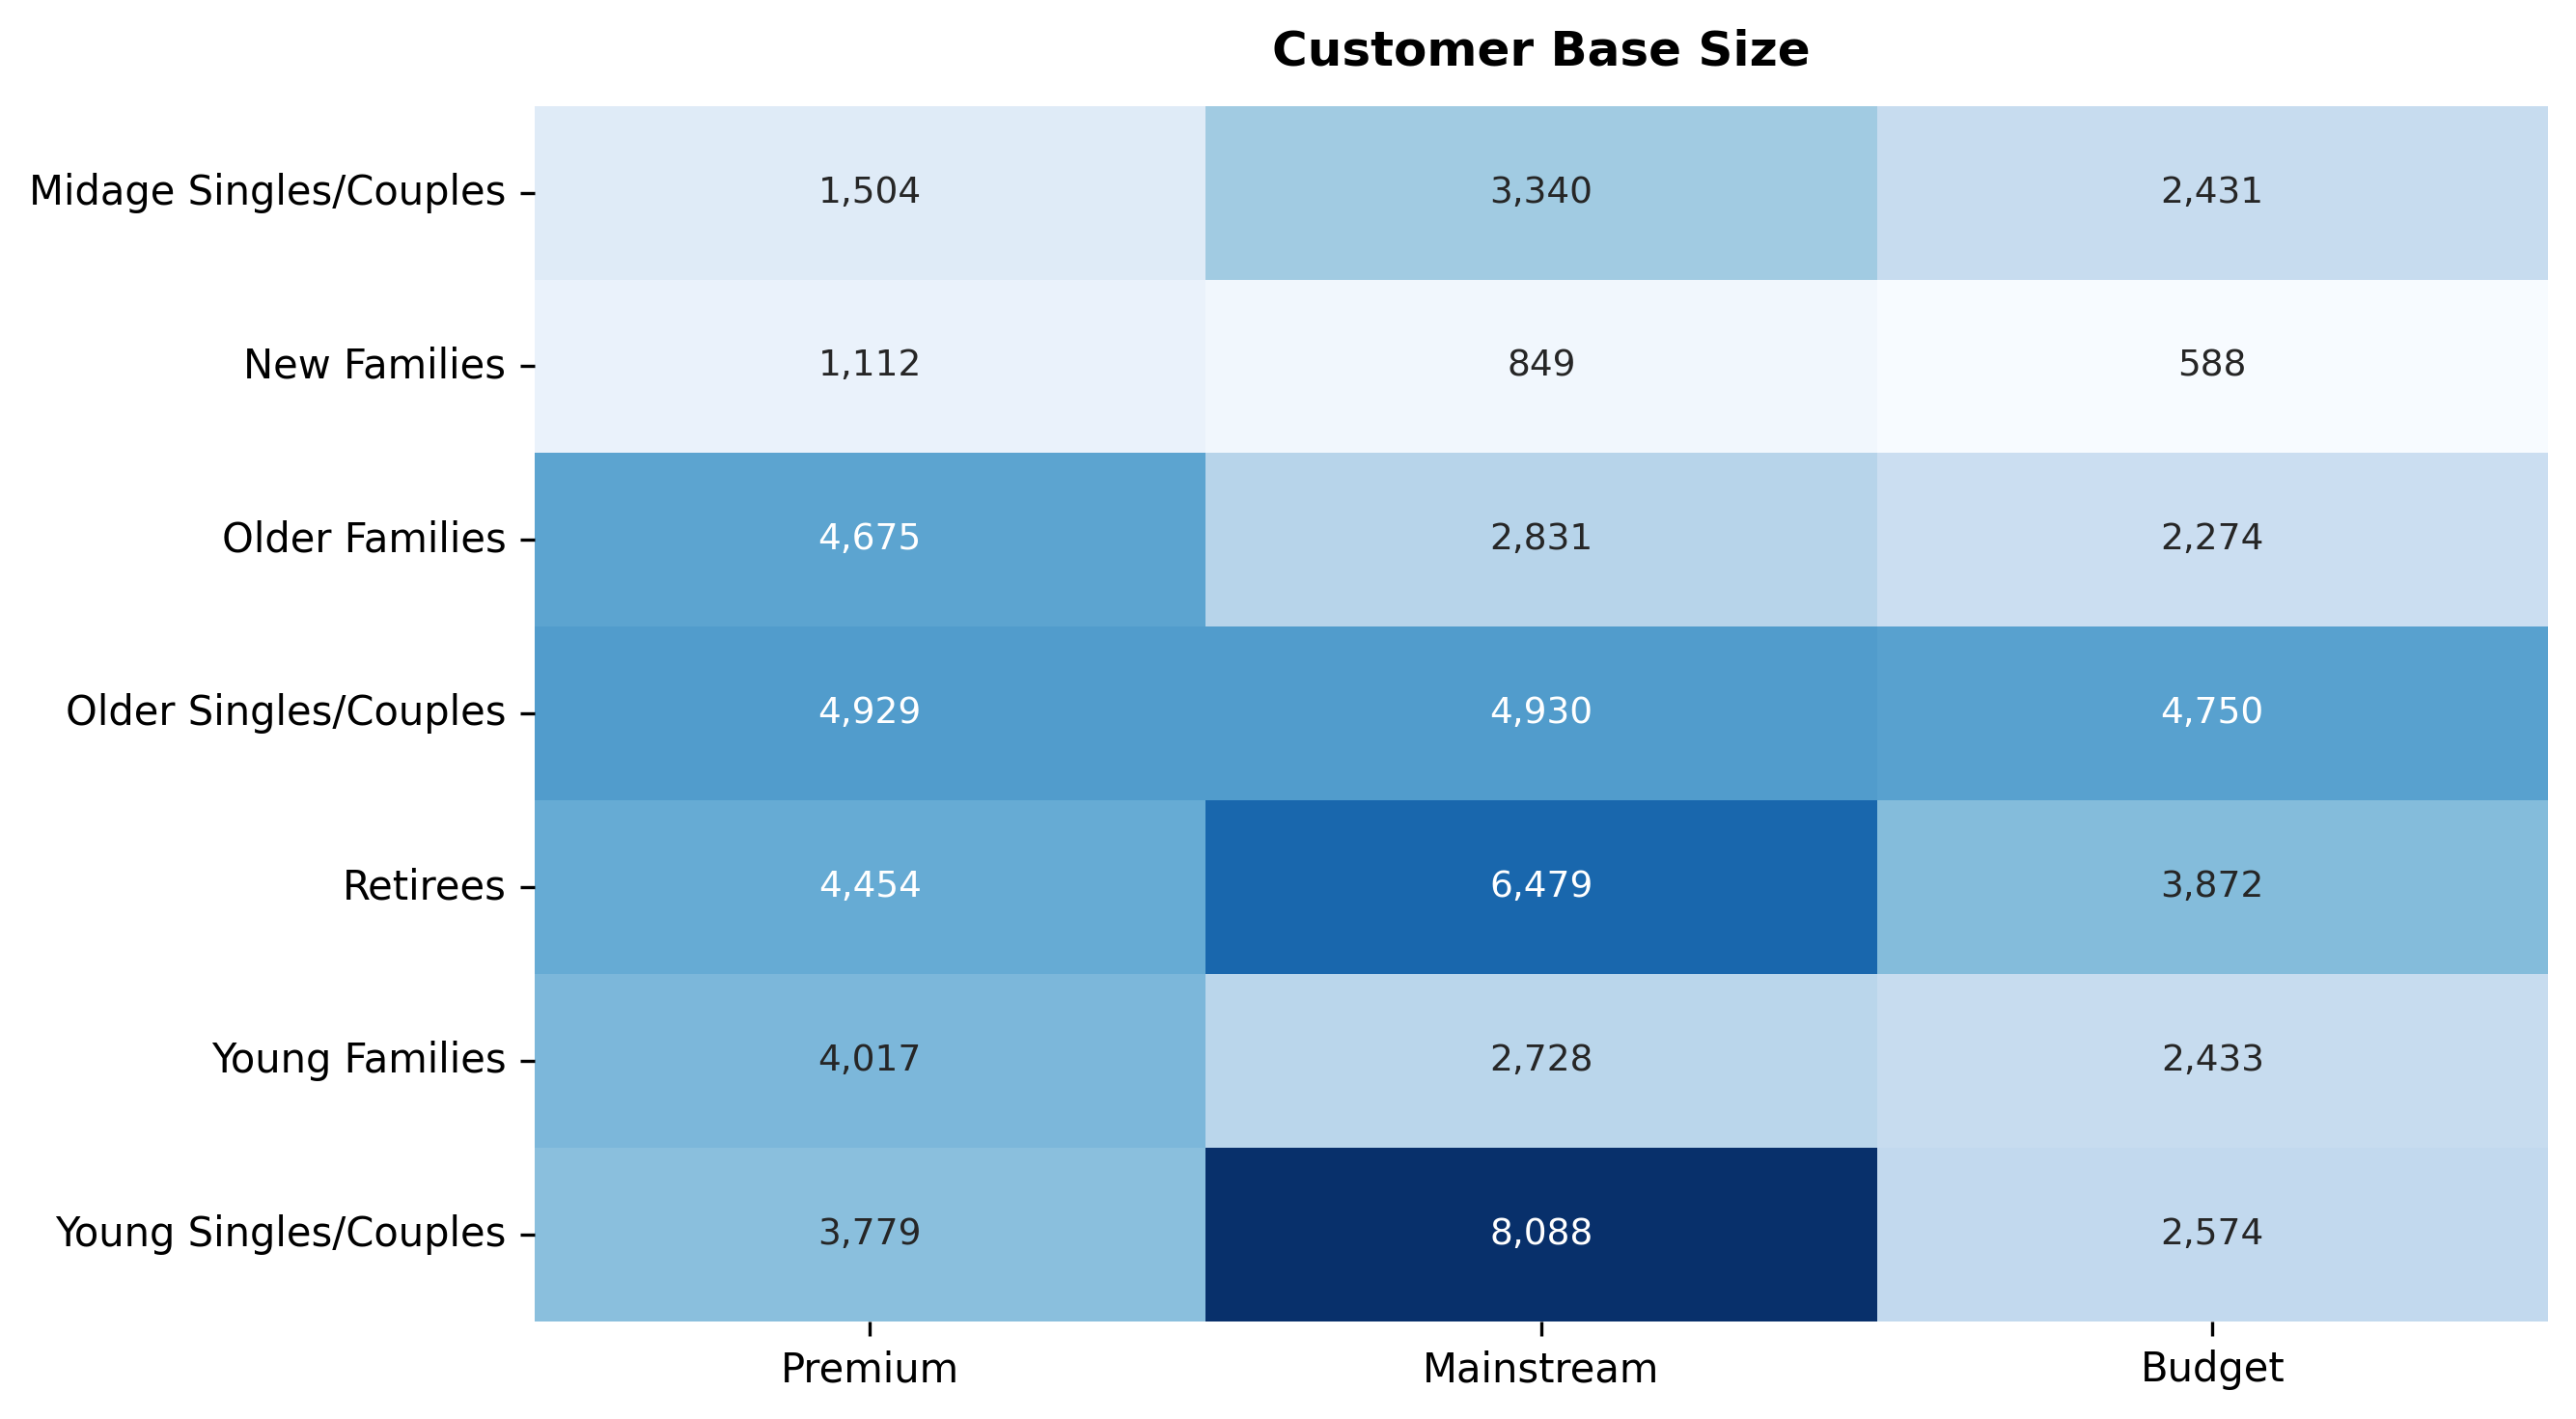

In [113]:
plt.figure(figsize=(9, 5), dpi=300)
ax = sns.heatmap(
    pivot_data,
    annot=True,
    fmt=',.0f',
    cmap='Blues',
    linewidths=0,
    annot_kws={'size': 9},
    cbar=False
)

# Remove all spines
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Professional labels
plt.title('Customer Base Size', fontsize=12, pad=10, fontweight='semibold')
plt.xlabel('')
plt.ylabel('')
ax.set_xticklabels(['Premium', 'Mainstream', 'Budget'], fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig('customer_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

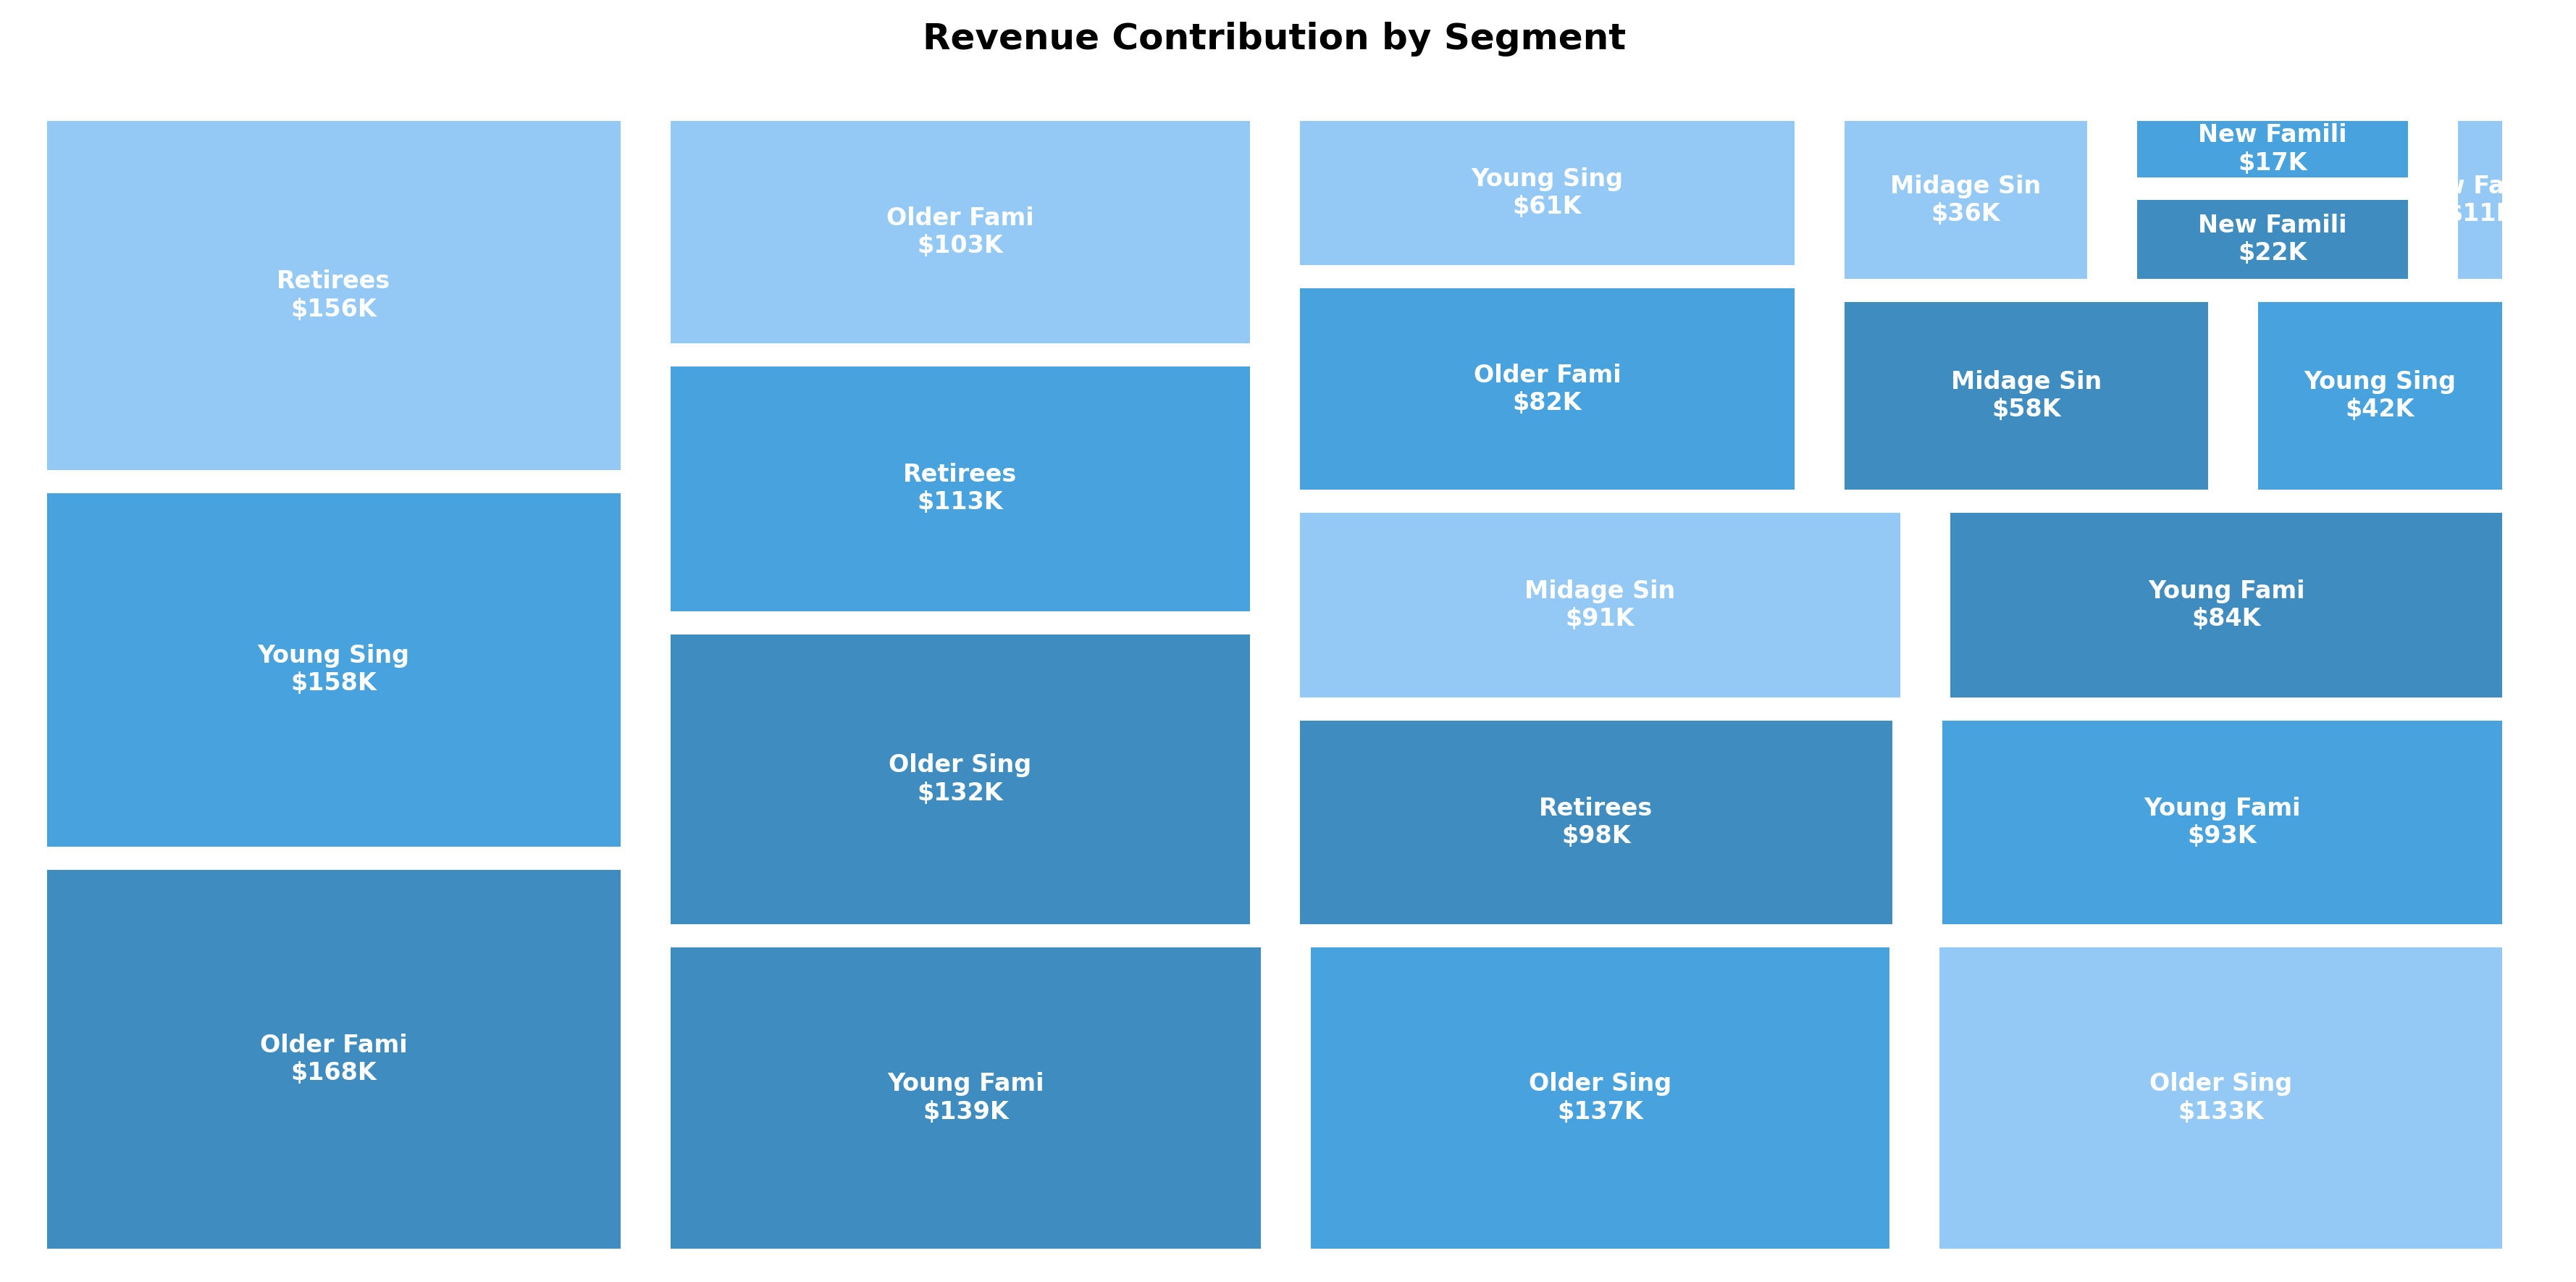

In [125]:
plt.figure(figsize=(12, 6), dpi=300)
squarify.plot(
    sizes=metrics_sorted['total_sales'],
    label=[f"{row['lifestage'][:10]}\n${row['total_sales']/1000:.0f}K" 
           for _, row in metrics_sorted.iterrows()],
    color=['#2980b9', '#3498db', '#89c4f4'],  # Blue gradient
    alpha=0.9,
    text_kwargs={'fontsize':8, 'color':'white', 'fontweight':'bold'},
    pad=1,
    bar_kwargs={'linewidth':0}  # No borders
)

# Remove all axes
plt.axis('off')
plt.title('Revenue Contribution by Segment', fontsize=12, pad=20, fontweight='semibold')

plt.tight_layout()
plt.savefig('revenue_treemap.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

## KEY FINDINGS

### 🏆 Top Performers
- **Older Families (Budget)**: Highest revenue ($168K) despite moderate basket size ($7.34)
- **Young Singles (Mainstream)**: 2nd highest sales with largest customer base (8,088)
- **Retirees (Mainstream)**: Strong performance with high transaction volume (21,363)

### 💡 Notable Patterns
1. **Budget segments dominate** top 5 positions
2. **Mainstream** shows consistent performance across lifestages
3. **Premium underperforms** - appears in rankings only after #12

### 📊 Metric Benchmarks
- **Average basket size**: $7.00-$7.50 across most segments
- **Transactions/customer**: ~5 transactions per customer
- **Quantity per transaction**: Consistently ~2 items

## RECOMMENDATIONS

1. **Increase focus on Budget segments** - Driving majority of revenue
2. **Upsell Premium customers** - Current basket sizes match Budget tiers
3. **New Families development** - Lowest performing group needs attention


....

.....

## 2. Product-Level Insights

**🎯 Objective:**  
Identify top-performing products and understand:  
1. Revenue contribution  
2. Sales volume  
3. Purchase frequency  
4. Customer reach  

In [132]:
# Aggregating key product performance indicators
product_insights = merged_df.groupby('product_name').agg(
    total_sales=('total_sales', 'sum'),
    total_units_sold=('quantity', 'sum'),
    num_transactions=('transaction_id', 'nunique'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

# Calculating derived metric
product_insights['avg_sales_per_transaction'] = (
    product_insights['total_sales'] / product_insights['num_transactions']
).round(2)

# Sorting by total revenue
product_insights = product_insights.sort_values(by='total_sales', ascending=False)


In [133]:
# Aggregating key product performance indicators
product_insights = merged_df.groupby('product_name').agg(
    total_sales=('total_sales', 'sum'),
    total_units_sold=('quantity', 'sum'),
    num_transactions=('transaction_id', 'nunique'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

# Calculating derived metric
product_insights['avg_sales_per_transaction'] = (
    product_insights['total_sales'] / product_insights['num_transactions']
).round(2)

# Sorting by total revenue
product_insights = product_insights.sort_values(by='total_sales', ascending=False)


In [134]:
print(product_insights.head(10))


                                product_name  total_sales  total_units_sold  \
11          Dorito Corn Chp     Supreme 380G      40352.0              6509   
86    Smiths Crnkle Chip  Orgnl Big Bag 380G      36367.6              6164   
77  Smiths Crinkle Chips Salt & Vinegar 330G      34804.2              6106   
33    Kettle Mozzarella   Basil & Pesto 175G      34457.4              6381   
76         Smiths Crinkle      Original 330G      34302.6              6018   
6                       Cheezels Cheese 330G      34296.9              6017   
12          Doritos Cheese      Supreme 330G      33390.6              5858   
39   Kettle Sweet Chilli And Sour Cream 175G      33031.8              6120   
34                      Kettle Original 175G      32740.2              6064   
35      Kettle Sea Salt     And Vinegar 175G      32589.0              6035   

    num_transactions  unique_customers  avg_sales_per_transaction  
11              3185              3112                      12

In [ ]:
# 📦 Product-Level Insights

# Grouping by product name to analyze performance
# Aggregating key metrics: total sales, quantity sold, transactions, and unique buyers
product_insights = merged_df.groupby('product_name').agg(
    total_sales=('total_sales', 'sum'),
    total_units_sold=('quantity', 'sum'),
    num_transactions=('transaction_id', 'nunique'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

# Calculating average sales per transaction to evaluate product value perception
product_insights['avg_sales_per_transaction'] = (
    product_insights['total_sales'] / product_insights['num_transactions']
).round(2)

# Sorting by total sales to identify top-performing SKUs
product_insights = product_insights.sort_values(by='total_sales', ascending=False)

# Formatting: add $ sign and comma separators for better readability
product_insights['total_sales'] = product_insights['total_sales'].apply(lambda x: f"${x:,.2f}")
product_insights['avg_sales_per_transaction'] = product_insights['avg_sales_per_transaction'].apply(lambda x: f"${x:,.2f}")
product_insights['total_units_sold'] = product_insights['total_units_sold'].apply(lambda x: f"{x:,}")
product_insights['num_transactions'] = product_insights['num_transactions'].apply(lambda x: f"{x:,}")
product_insights['unique_customers'] = product_insights['unique_customers'].apply(lambda x: f"{x:,}")

# Previewing the top 10 best-selling products
product_insights.head(10)

,product_name,total_sales,total_units_sold,num_transactions,unique_customers,avg_sales_per_transaction
11,Dorito Corn Chp Supreme 380G,"$40,352.00","6,509","3,185","3,112",$12.67
86,Smiths Crnkle Chip Orgnl Big Bag 380G,"$36,367.60","6,164","3,233","3,149",$11.25
77,Smiths Crinkle Chips Salt & Vinegar 330G,"$34,804.20","6,106","3,197","3,106",$10.89
33,Kettle Mozzarella Basil & Pesto 175G,"$34,457.40","6,381","3,304","3,215",$10.43
76,Smiths Crinkle Original 330G,"$34,302.60","6,018","3,142","3,064",$10.92
6,Cheezels Cheese 330G,"$34,296.90","6,017","3,149","3,061",$10.89
12,Doritos Cheese Supreme 330G,"$33,390.60","5,858","3,052","2,991",$10.94
39,Kettle Sweet Chilli And Sour Cream 175G,"$33,031.80","6,120","3,200","3,103",$10.32
34,Kettle Original 175G,"$32,740.20","6,064","3,159","3,081",$10.36
35,Kettle Sea Salt And Vinegar 175G,"$32,589.00","6,035","3,173","3,084",$10.27


In [140]:
# 🧮 Grouping by product, lifestage, and customer_type
product_segmentation_summary = merged_df.groupby(
    ['product_name', 'lifestage', 'customer_type']
).agg(
    total_sales_raw=('total_sales', 'sum'),  # preserve raw numeric for sorting
    total_quantity=('quantity', 'sum'),
    num_transactions=('transaction_id', 'nunique'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

# 🎯 Calculating KPIs
product_segmentation_summary['avg_sales_per_txn'] = (
    product_segmentation_summary['total_sales_raw'] / product_segmentation_summary['num_transactions']
)
product_segmentation_summary['avg_quantity_per_txn'] = (
    product_segmentation_summary['total_quantity'] / product_segmentation_summary['num_transactions']
)

# 🔽 Sorting by total_sales in descending order
product_segmentation_summary = product_segmentation_summary.sort_values(
    by='total_sales_raw', ascending=False
)

# 💲 Formatting for presentation
product_segmentation_summary['total_sales'] = product_segmentation_summary['total_sales_raw'].apply(lambda x: f"${x:,.2f}")
product_segmentation_summary['total_quantity'] = product_segmentation_summary['total_quantity'].apply(lambda x: f"{x:,}")
product_segmentation_summary['num_transactions'] = product_segmentation_summary['num_transactions'].apply(lambda x: f"{x:,}")
product_segmentation_summary['unique_customers'] = product_segmentation_summary['unique_customers'].apply(lambda x: f"{x:,}")
product_segmentation_summary['avg_sales_per_txn'] = product_segmentation_summary['avg_sales_per_txn'].apply(lambda x: f"${x:.2f}")
product_segmentation_summary['avg_quantity_per_txn'] = product_segmentation_summary['avg_quantity_per_txn'].apply(lambda x: f"{x:.2f}")

# 🧹 Drop raw column used for sorting
product_segmentation_summary.drop(columns='total_sales_raw', inplace=True)

# 📌 Preview top 10 sorted rows
product_segmentation_summary.head(10)


,product_name,lifestage,customer_type,total_quantity,num_transactions,unique_customers,avg_sales_per_txn,avg_quantity_per_txn,total_sales
250,Dorito Corn Chp Supreme 380G,Young Singles/Couples,Mainstream,569,303,296,$12.08,1.88,"$3,659.50"
1825,Smiths Crnkle Chip Orgnl Big Bag 380G,Young Singles/Couples,Mainstream,596,323,318,$10.89,1.85,"$3,516.40"
712,Kettle Mozzarella Basil & Pesto 175G,Young Singles/Couples,Mainstream,626,332,325,$10.18,1.89,"$3,380.40"
1636,Smiths Crinkle Chips Salt & Vinegar 330G,Young Singles/Couples,Mainstream,582,314,310,$10.56,1.85,"$3,317.40"
271,Doritos Cheese Supreme 330G,Young Singles/Couples,Mainstream,559,303,299,$10.52,1.84,"$3,186.30"
1623,Smiths Crinkle Chips Salt & Vinegar 330G,Older Families,Budget,559,289,278,$11.03,1.93,"$3,186.30"
237,Dorito Corn Chp Supreme 380G,Older Families,Budget,486,248,242,$12.59,1.96,"$3,123.25"
132,Cheezels Cheese 330G,Older Families,Budget,543,275,268,$11.25,1.97,"$3,095.10"
145,Cheezels Cheese 330G,Young Singles/Couples,Mainstream,542,287,280,$10.76,1.89,"$3,089.40"
838,Kettle Sweet Chilli And Sour Cream 175G,Young Singles/Couples,Mainstream,572,306,299,$10.09,1.87,"$3,088.80"


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\user\AppData\Local\Temp\ipykernel_21752\2504434748.py:4: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)
C:\Users\user\AppData\Local\Temp\ipykernel_21752\2504434748.py:27: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21752\2504434748.py:28: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.savefig('product_sales_heatmap.png', bbox_inches='tight', dpi=300)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


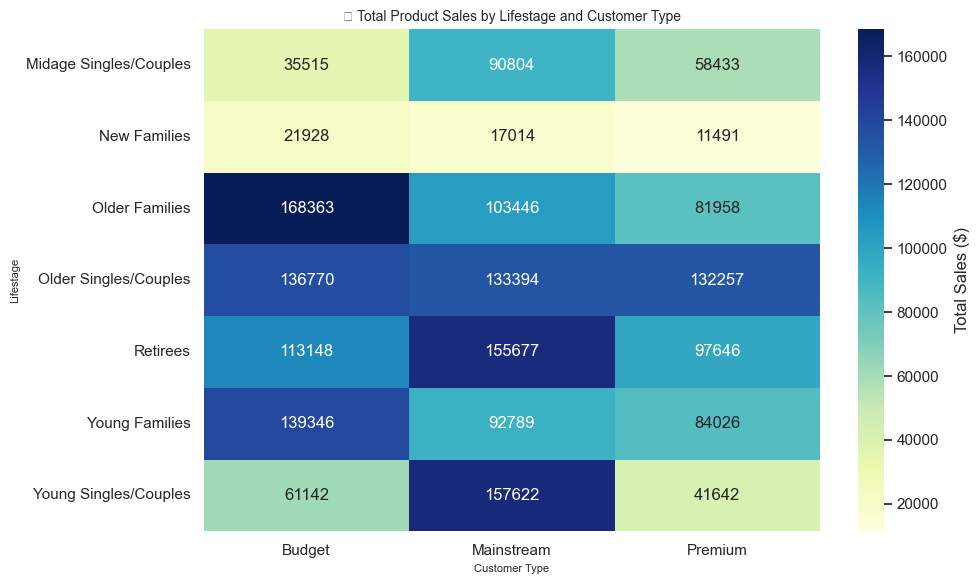

In [145]:
# 🔁 Converting total_sales back to numeric for plotting
product_segmentation_summary['total_sales_numeric'] = (
    product_segmentation_summary['total_sales']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

# 🎨 Set visual style
plt.figure(figsize=(10, 6))
pivot_table = product_segmentation_summary.pivot_table(
    index='lifestage',
    columns='customer_type',
    values='total_sales_numeric',
    aggfunc='sum'
)

sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total Sales ($)'})
plt.title("💰 Total Product Sales by Lifestage and Customer Type", fontsize=10)
plt.xlabel("Customer Type", fontsize=8)
plt.ylabel("Lifestage", fontsize=8)

# ✨ Professional formatting
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('product_sales_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21752\2824794866.py:20: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


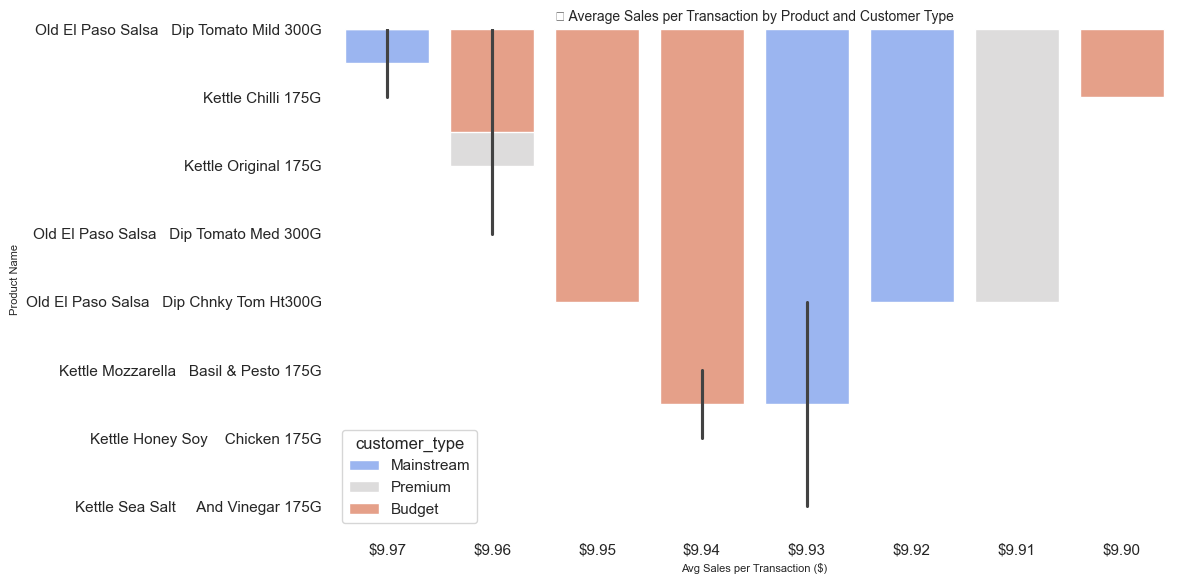

In [142]:
# 📊 Bar chart for avg sales per txn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=product_segmentation_summary.sort_values('avg_sales_per_txn', ascending=False).head(15),
    x='avg_sales_per_txn',
    y='product_name',
    hue='customer_type',
    dodge=False,
    palette='coolwarm'
)
plt.title("🛒 Average Sales per Transaction by Product and Customer Type", fontsize=10)
plt.xlabel("Avg Sales per Transaction ($)", fontsize=8)
plt.ylabel("Product Name", fontsize=8)

# 🧹 Clean up
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21752\3269926872.py:20: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21752\3269926872.py:21: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Arial.
  plt.savefig('avg_sales_per_txn_by_product.png', bbox_inches='tight', dpi=300)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


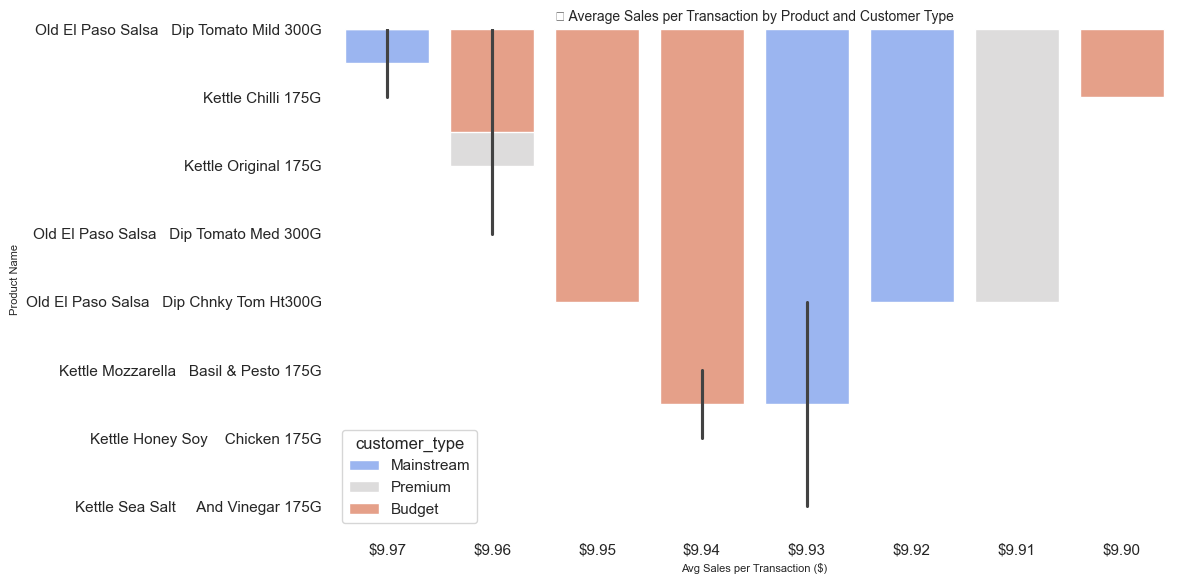

In [147]:
# 📊 Bar chart for avg sales per txn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=product_segmentation_summary.sort_values('avg_sales_per_txn', ascending=False).head(15),
    x='avg_sales_per_txn',
    y='product_name',
    hue='customer_type',
    dodge=False,
    palette='coolwarm'
)
plt.title("🛒 Average Sales per Transaction by Product and Customer Type", fontsize=10)
plt.xlabel("Avg Sales per Transaction ($)", fontsize=8)
plt.ylabel("Product Name", fontsize=8)

# 🧹 Clean up
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('avg_sales_per_txn_by_product.png', bbox_inches='tight', dpi=300)
plt.show()


# Sales Performance Summary  

## Top 5 Products by Revenue  
1. **Dorito Corn Chp Supreme 380G** – **\$40,352.00**  
2. **Smiths Crnkle Chip Orgnl Big Bag 380G** – **\$36,367.60**  
3. **Smiths Crinkle Chips Salt & Vinegar 330G** – **\$34,804.20**  
4. **Kettle Mozzarella Basil & Pesto 175G** – **\$34,457.40**  
5. **Smiths Crinkle Original 330G** – **\$34,302.60**  

## Key Insights  
- 🏆 **Dorito Corn Chp Supreme 380G** is the best-selling product in both **revenue (\$40K+)** and **units sold (6,509)**.  
- 🔄 **Kettle Mozzarella Basil & Pesto 175G** has the most **transactions (3,304)** and **unique customers (3,215)**.  
- 📦 **Cheezels Cheese 330G** sells in high volume (6,017 units) but ranks **6th in revenue**.  
- 💰 **Average transaction value** ranges from **\$10.27 (Kettle Sea Salt & Vinegar)** to **\$12.67 (Dorito Supreme)**.  

## Recommendations  
✅ **Push high-value products** (e.g., Dorito Supreme) with promotions to maximize revenue.  
✅ **Stock more high-demand items** like Kettle Mozzarella and Smiths Crinkle chips.  
✅ **Encourage repeat purchases** through loyalty programs for top-performing products.  




......

# Basket Size & Frequency Analysis

### Objectives

- **Quantify Customer Basket Size:**  
  Measure the average number of items purchased per transaction to understand purchasing volume across different customer segments.

- **Evaluate Transaction Value:**  
  Assess the average monetary value of each transaction, segmented by customer demographics, to identify high-value purchasing behavior.

- **Analyze Purchase Frequency:**  
  Determine how often customers make transactions within the observed period, segmented by lifestyle and customer type, to uncover loyalty and engagement patterns.

- **Identify Segment-Specific Behaviors:**  
  Highlight differences in basket size, transaction value, and purchase frequency among customer lifestage and type segments, supporting targeted marketing and promotional strategies.

- **Enable Strategic Recommendations:**  
  Use these insights to inform data-driven strategies for upselling, cross-selling, and personalized customer engagement aimed at increasing revenue and customer retention.


In [148]:
# Group data by transaction to calculate basket size (quantity) and total sales per basket
basket_metrics = merged_df.groupby('transaction_id').agg(
    basket_size=('quantity', 'sum'),
    basket_value=('total_sales', 'sum'),
    customer_id=('customer_id', 'first')
).reset_index()

# Merge basket metrics with customer segmentation info
basket_metrics = basket_metrics.merge(
    merged_df[['customer_id', 'lifestage', 'customer_type']].drop_duplicates(),
    on='customer_id',
    how='left'
)

# Average basket size and value by segment
basket_summary = basket_metrics.groupby(['lifestage', 'customer_type']).agg(
    avg_basket_size=('basket_size', 'mean'),
    avg_basket_value=('basket_value', 'mean')
).reset_index()

# Calculate transaction frequency per customer
transaction_counts = merged_df.groupby('customer_id')['transaction_id'].nunique().reset_index()
transaction_counts.columns = ['customer_id', 'transaction_frequency']

# Merge frequency with segmentation data
transaction_freq = transaction_counts.merge(
    merged_df[['customer_id', 'lifestage', 'customer_type']].drop_duplicates(),
    on='customer_id',
    how='left'
)

# Average frequency by segment
frequency_summary = transaction_freq.groupby(['lifestage', 'customer_type']).agg(
    avg_transaction_frequency=('transaction_frequency', 'mean')
).reset_index()

# Display summaries
print("Basket Summary:\n", basket_summary)
print("\nTransaction Frequency Summary:\n", frequency_summary)


Basket Summary:
                  lifestage customer_type  avg_basket_size  avg_basket_value
0   Midage Singles/Couples        Budget         1.903769          7.120048
1   Midage Singles/Couples    Mainstream         1.923481          7.694589
2   Midage Singles/Couples       Premium         1.902696          7.160864
3             New Families        Budget         1.862588          7.331478
4             New Families    Mainstream         1.860836          7.330418
5             New Families       Premium         1.866793          7.254482
6           Older Families        Budget         1.964901          7.340887
7           Older Families    Mainstream         1.966697          7.329806
8           Older Families       Premium         2.001354          7.398303
9    Older Singles/Couples        Budget         1.924485          7.473351
10   Older Singles/Couples    Mainstream         1.923766          7.332527
11   Older Singles/Couples       Premium         1.924994          7.49

In [150]:
# Calculate basket size and value per transaction
basket_metrics = merged_df.groupby('transaction_id').agg(
    basket_size=('quantity', 'sum'),
    basket_value=('total_sales', 'sum'),
    customer_id=('customer_id', 'first')
).reset_index()

# Add customer segmentation info to basket metrics
basket_metrics = basket_metrics.merge(
    merged_df[['customer_id', 'lifestage', 'customer_type']].drop_duplicates(),
    on='customer_id',
    how='left'
)

# %%
# Calculate average basket metrics by customer segment
basket_summary = basket_metrics.groupby(['lifestage', 'customer_type']).agg(
    avg_basket_size=('basket_size', 'mean'),
    avg_basket_value=('basket_value', 'mean')
).reset_index()

# Display basket summary with formatting
from IPython.display import display
import pandas as pd

print("🛒 Basket Metrics by Customer Segment:")
display(basket_summary.style
        .format({'avg_basket_size': '{:.1f}', 'avg_basket_value': '${:,.2f}'})
        .set_caption("Average Basket Size and Value by Customer Segment")
        .background_gradient(cmap='Blues'))

# %%
# Calculate transaction frequency per customer
transaction_counts = merged_df.groupby('customer_id')['transaction_id'].nunique().reset_index()
transaction_counts.columns = ['customer_id', 'transaction_frequency']

# Add segmentation data to frequency metrics
transaction_freq = transaction_counts.merge(
    merged_df[['customer_id', 'lifestage', 'customer_type']].drop_duplicates(),
    on='customer_id',
    how='left'
)

# %%
# Calculate average transaction frequency by segment
frequency_summary = transaction_freq.groupby(['lifestage', 'customer_type']).agg(
    avg_transaction_frequency=('transaction_frequency', 'mean')
).reset_index()

# Display frequency summary with formatting
print("\n📊 Transaction Frequency by Customer Segment:")
display(frequency_summary.style
        .format({'avg_transaction_frequency': '{:.1f}'})
        .set_caption("Average Transaction Frequency by Customer Segment")
        .background_gradient(cmap='Greens'))

🛒 Basket Metrics by Customer Segment:


,lifestage,customer_type,avg_basket_size,avg_basket_value
0,Midage Singles/Couples,Budget,1.9,$7.12
1,Midage Singles/Couples,Mainstream,1.9,$7.69
2,Midage Singles/Couples,Premium,1.9,$7.16
3,New Families,Budget,1.9,$7.33
4,New Families,Mainstream,1.9,$7.33
5,New Families,Premium,1.9,$7.25
6,Older Families,Budget,2.0,$7.34
7,Older Families,Mainstream,2.0,$7.33
8,Older Families,Premium,2.0,$7.40
9,Older Singles/Couples,Budget,1.9,$7.47



📊 Transaction Frequency by Customer Segment:


,lifestage,customer_type,avg_transaction_frequency
0,Midage Singles/Couples,Budget,3.3
1,Midage Singles/Couples,Mainstream,3.5
2,Midage Singles/Couples,Premium,3.4
3,New Families,Budget,2.7
4,New Families,Mainstream,2.7
5,New Families,Premium,2.7
6,Older Families,Budget,4.9
7,Older Families,Mainstream,5.0
8,Older Families,Premium,4.9
9,Older Singles/Couples,Budget,3.7


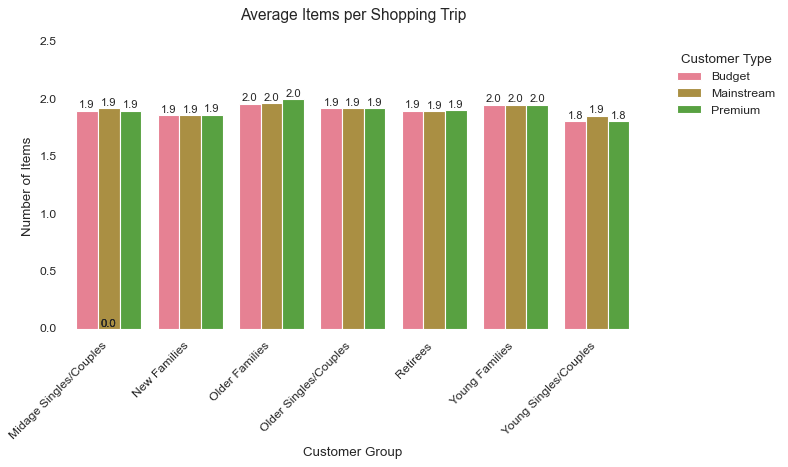

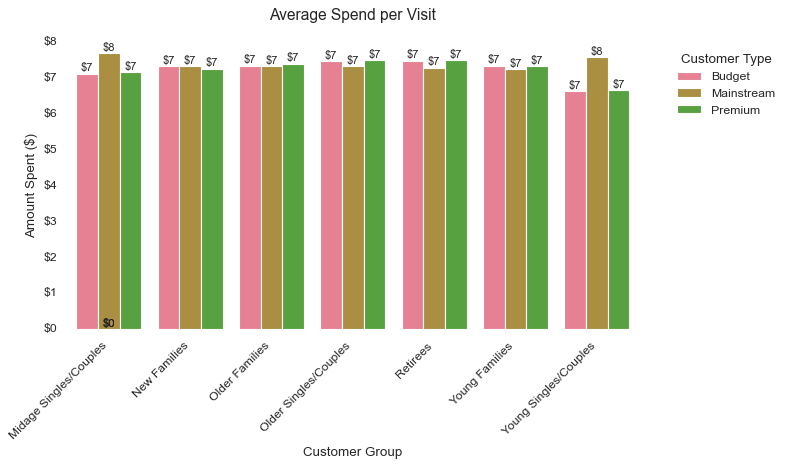

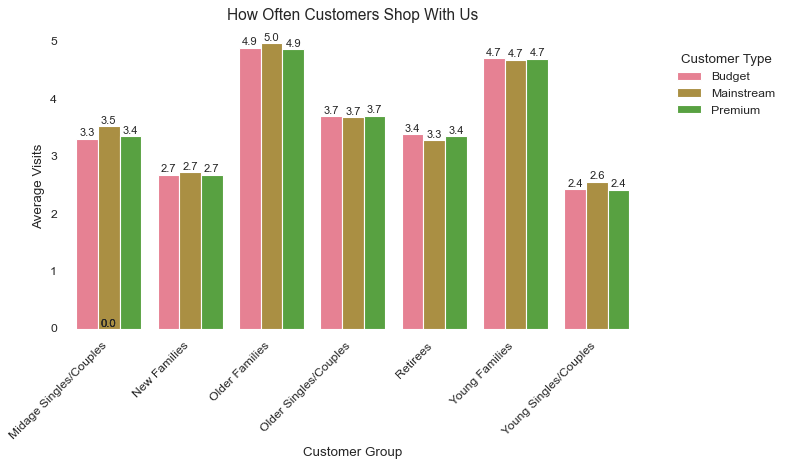

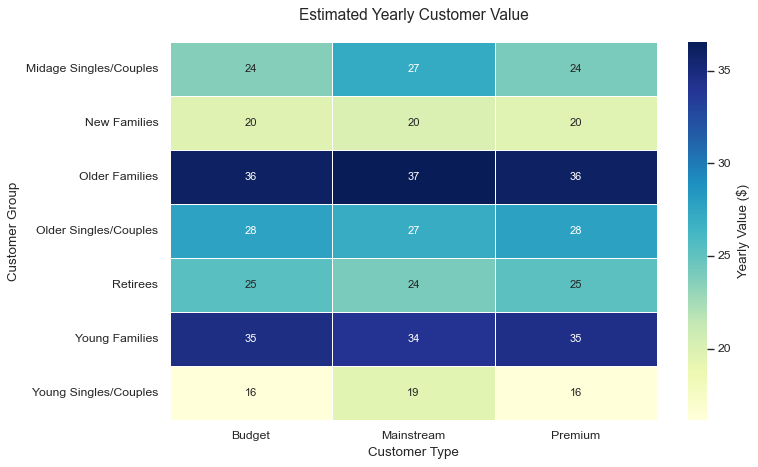

In [157]:
plt.style.use('classic')
sns.set_theme(style="white", palette="husl") 

# First let's understand what customers are putting in their carts
customer_baskets = merged_df.groupby('transaction_id').agg(
    item_count=('quantity', 'sum'),
    total_spend=('total_sales', 'sum'),
    customer_id=('customer_id', 'first')
).reset_index()

# Add customer demographic information
customer_baskets = customer_baskets.merge(
    merged_df[['customer_id', 'lifestage', 'customer_type']].drop_duplicates(),
    on='customer_id',
    how='left'
)

# Calculate average basket metrics
basket_stats = customer_baskets.groupby(['lifestage', 'customer_type']).agg(
    avg_items=('item_count', 'mean'),
    avg_spend=('total_spend', 'mean')
).reset_index()

# Visualize how many items different customer groups buy
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=basket_stats, x='lifestage', y='avg_items', 
                hue='customer_type', errorbar=None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.grid(False)
plt.title('Average Items per Shopping Trip', fontsize=14, pad=20)
plt.ylabel('Number of Items', fontsize=12)
plt.xlabel('Customer Group', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type', frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')  # Fixed: changed 'upper_left' to 'upper left'

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', 
               xytext=(0, 5), 
               textcoords='offset points',
               fontsize=10)
plt.tight_layout()
plt.savefig('average_items_per_trip.png', bbox_inches='tight', dpi=300)
plt.show()

# Now look at spending patterns
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=basket_stats, x='lifestage', y='avg_spend', 
                hue='customer_type', errorbar=None)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.grid(False)
plt.title('Average Spend per Visit', fontsize=14, pad=20)
plt.ylabel('Amount Spent ($)', fontsize=12)
plt.xlabel('Customer Group', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type', frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')  # Fixed here too
ax.yaxis.set_major_formatter('${x:,.0f}')

for p in ax.patches:
    ax.annotate(f"${p.get_height():.0f}", 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', 
               xytext=(0, 5), 
               textcoords='offset points',
               fontsize=10)
plt.tight_layout()
plt.savefig('average_spend_per_visit.png', bbox_inches='tight', dpi=300)
plt.show()

# Analyze shopping frequency patterns
visit_counts = merged_df.groupby('customer_id')['transaction_id'].nunique().reset_index()
visit_counts.columns = ['customer_id', 'visits']

visit_data = visit_counts.merge(
    merged_df[['customer_id', 'lifestage', 'customer_type']].drop_duplicates(),
    on='customer_id',
    how='left'
)

visit_stats = visit_data.groupby(['lifestage', 'customer_type']).agg(
    avg_visits=('visits', 'mean')
).reset_index()

# Visualize visit frequency
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=visit_stats, x='lifestage', y='avg_visits', 
                hue='customer_type', errorbar=None)
sns.despine(left=True, bottom=True, top=True, right=True)
plt.grid(False)
plt.title('How Often Customers Shop With Us', fontsize=14, pad=20)
plt.ylabel('Average Visits', fontsize=12)
plt.xlabel('Customer Group', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type', frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')  # And here

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', 
               xytext=(0, 5), 
               textcoords='offset points',
               fontsize=10)
plt.tight_layout()
plt.savefig('visit_frequency_by_segment.png', bbox_inches='tight', dpi=300)
plt.show()

# Combine metrics to understand customer value
customer_value = basket_stats.merge(visit_stats, on=['lifestage', 'customer_type'])
customer_value['yearly_value'] = customer_value['avg_spend'] * customer_value['avg_visits']

value_grid = customer_value.pivot(index='lifestage', columns='customer_type', 
                                values='yearly_value')

# Visualize customer value
plt.figure(figsize=(10, 6))
ax = sns.heatmap(value_grid, annot=True, fmt='.0f', cmap='YlGnBu', 
                linewidths=.5, cbar_kws={'label': 'Yearly Value ($)'},
                annot_kws={'fontsize':10})
for spine in ax.spines.values():
    spine.set_visible(False)
plt.title('Estimated Yearly Customer Value', fontsize=14, pad=20)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Customer Group', fontsize=12)
plt.tight_layout()
plt.savefig('customer_value_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()

**Summary of Findings:**  
The analysis reveals that **Older Families and Young Families** exhibit the largest basket sizes (2.0 items) and highest transaction frequency (~5 visits), indicating strong purchasing engagement, while **Young Singles/Couples (Budget & Premium)** show the smallest basket sizes (1.8 items) and lowest frequency (~2.4 visits), suggesting lower engagement. **Mainstream Midage Singles/Couples** spend the most per transaction ($7.69), whereas **Budget Young Singles/Couples** spend the least ($6.64). Transaction frequency is highest among **Older Families (~5 visits)** and lowest among **Young Singles/Couples (~2.4 visits)**, with **New Families** also showing lower frequency (~2.7 visits). These insights highlight opportunities for segment-specific strategies—such as loyalty programs for frequent family shoppers and targeted promotions for young singles—to boost basket size, value, and retention.

....

......

In [186]:
# Calculating total spend per customer
customer_spend = merged_df.groupby('customer_id')['total_sales'].sum().reset_index()
customer_spend.columns = ['customer_id', 'total_spent']

# Displaying the top 10 high-value customers
customer_spend.sort_values(by='total_spent', ascending=False).head(10)


,customer_id,total_spent
36308,226000,1300.00
37567,230078,138.60
61530,63197,132.80
46592,259009,127.20
17124,162039,126.80
60029,58361,124.80
37651,230154,124.40
71289,94185,122.80
8856,130090,122.65
22747,179228,120.80


In [167]:
sns.set_theme(style='whitegrid', palette='pastel')


In [170]:
# Average spend per transaction
avg_spend_per_txn = merged_df.groupby('customer_id')['total_sales'].mean().reset_index()
avg_spend_per_txn.columns = ['customer_id', 'avg_spend_per_txn']

# Displaying a sample
avg_spend_per_txn.head()


,customer_id,avg_spend_per_txn
0,1000,6.000000
1,10000,4.666667
2,100000,6.280000
3,100001,7.644444
4,100002,7.550000


In [ ]:
# Transaction frequency per customer
txn_count_per_customer = merged_df.groupby('customer_id')['transaction_id'].nunique().reset_index()
txn_count_per_customer.columns = ['customer_id', 'num_transactions']

# top 10 customers by transaction count
txn_count_per_customer.head(10).sort_values(by='num_transactions', ascending=False)


,customer_id,num_transactions
8,100006,13
3,100001,9
5,100003,9
4,100002,8
7,100005,7
6,100004,6
2,100000,5
9,100007,4
1,10000,3
0,1000,1


In [ ]:
# Combining all metrics
customer_behavior = customer_spend.merge(avg_spend_per_txn, on='customer_id')
customer_behavior = customer_behavior.merge(txn_count_per_customer, on='customer_id')

# Previewing the merged metrics
customer_behavior.head(10).sort_values(by=['total_spent','avg_spend_per_txn'] , ascending=False)


,customer_id,total_spent,avg_spend_per_txn,num_transactions
8,100006,89.6,6.892308,13
3,100001,68.8,7.644444,9
4,100002,60.4,7.550000,8
5,100003,53.6,5.955556,9
7,100005,47.5,6.785714,7
6,100004,41.8,6.966667,6
2,100000,31.4,6.280000,5
9,100007,21.2,5.300000,4
1,10000,14.0,4.666667,3
0,1000,6.0,6.000000,1


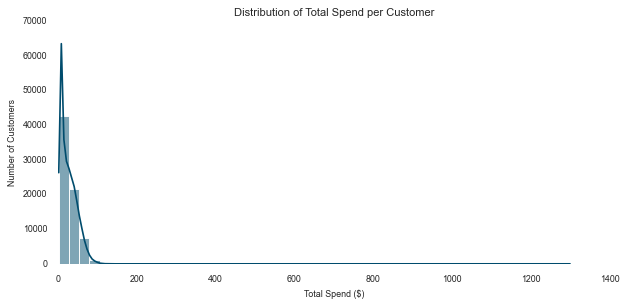

In [188]:
# Setting figure size
plt.figure(figsize=(8, 4))

# Creating the histogram with KDE
sns.histplot(customer_behavior['total_spent'], bins=50, kde=True, color="#004c6d")

# Setting the chart title and labels with appropriate font sizes
plt.title('Distribution of Total Spend per Customer', fontsize=10)
plt.xlabel('Total Spend ($)', fontsize=8)
plt.ylabel('Number of Customers', fontsize=8)

# Formatting ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Removing spines for a cleaner look
sns.despine(top=True, right=True, left=True, bottom=True)

# Removing gridlines
plt.grid(False)

# Displaying the final professional chart
plt.tight_layout()
plt.savefig('customer_spend_distribution.png', bbox_inches='tight', dpi=300) 
plt.show()


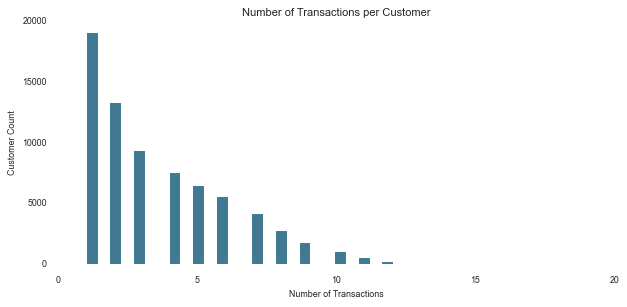

In [190]:
# Setting figure size
plt.figure(figsize=(8, 4))

# Creating the histogram without KDE
sns.histplot(customer_behavior['num_transactions'], bins=40, kde=False, color="#004c6d")

# Setting the chart title and axis labels
plt.title('Number of Transactions per Customer', fontsize=10)
plt.xlabel('Number of Transactions', fontsize=8)
plt.ylabel('Customer Count', fontsize=8)

# Formatting axis ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Removing spines for a cleaner, modern presentation
sns.despine(top=True, right=True, left=True, bottom=True)

# Removing gridlines
plt.grid(False)

# Final layout adjustment and display
plt.tight_layout()
plt.savefig('customer_transaction_distribution.png', bbox_inches='tight', dpi=300) 
plt.show()

In [ ]:
# Setting up Seaborn visual style
sns.set_theme(style='whitegrid', palette='pastel')

# 2. Loading the dataset
# Assuming your DataFrame is already named `merged_df`
# merged_df = pd.read_csv('your_cleaned_data.csv')  # Uncomment and update if loading anew

# 3. Calculating customer purchase metrics
purchase_metrics = merged_df.groupby(['lifestage', 'customer_type']).agg(
    total_sales=('total_sales', 'sum'),
    total_quantity=('quantity', 'sum'),
    num_transactions=('transaction_id', 'nunique'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

purchase_metrics['avg_sales_per_txn'] = purchase_metrics['total_sales'] / purchase_metrics['num_transactions']
purchase_metrics['avg_quantity_per_txn'] = purchase_metrics['total_quantity'] / purchase_metrics['num_transactions']

# 4. Formatting numeric columns with commas and dollar signs
purchase_metrics['total_sales'] = purchase_metrics['total_sales'].apply(lambda x: f"${x:,.2f}")
purchase_metrics['total_quantity'] = purchase_metrics['total_quantity'].apply(lambda x: f"{x:,.0f}")
purchase_metrics['num_transactions'] = purchase_metrics['num_transactions'].apply(lambda x: f"{x:,}")
purchase_metrics['unique_customers'] = purchase_metrics['unique_customers'].apply(lambda x: f"{x:,}")
purchase_metrics['avg_sales_per_txn'] = purchase_metrics['avg_sales_per_txn'].apply(lambda x: f"${x:,.2f}")
purchase_metrics['avg_quantity_per_txn'] = purchase_metrics['avg_quantity_per_txn'].apply(lambda x: f"{x:,.2f}")

# 5. Displaying the final formatted DataFrame
purchase_metrics.sort_values(by='total_sales', ascending=False, inplace=True)
purchase_metrics.reset_index(drop=True, inplace=True)
purchase_metrics


,lifestage,customer_type,total_sales,total_quantity,num_transactions,unique_customers,avg_sales_per_txn,avg_quantity_per_txn
0,Retirees,Premium,"$97,646.05","24,884","13,036","3,872",$7.49,1.91
1,Young Families,Mainstream,"$92,788.75","25,044","12,808","2,728",$7.24,1.96
2,Midage Singles/Couples,Mainstream,"$90,803.85","22,699","11,801","3,340",$7.69,1.92
3,Young Families,Premium,"$84,025.50","22,406","11,464","2,433",$7.33,1.95
4,Older Families,Premium,"$81,958.40","22,171","11,078","2,274",$7.40,2.00
5,Young Singles/Couples,Budget,"$61,141.60","16,671","9,214","3,779",$6.64,1.81
6,Midage Singles/Couples,Premium,"$58,432.65","15,526","8,160","2,431",$7.16,1.90
7,Young Singles/Couples,Premium,"$41,642.10","11,331","6,258","2,574",$6.65,1.81
8,Midage Singles/Couples,Budget,"$35,514.80","9,496","4,988","1,504",$7.12,1.90
9,New Families,Budget,"$21,928.45","5,571","2,991","1,112",$7.33,1.86


💡 Insights
Top Spender: Customer 100006 leads in total spend at $89.60 across 13 transactions, indicating high engagement and loyalty.

Highest Avg Spend per Txn: Customer 100001 shows the highest average spend per transaction at $7.64, signaling premium purchase behavior.

Consistent Engagement: Several customers (e.g., 100001, 100002, 100003) maintain both high total spend and frequent transactions — ideal profiles for loyalty campaigns.

Low Activity Tiers: Customers like 1000 and 10000 demonstrate minimal interaction. These may benefit from targeted re-engagement strategies.

🧭 Strategic Implications
Retention & Loyalty: Prioritize customers with high total spend and transaction count for exclusive offers or VIP programs.

Upsell Opportunities: Target customers with moderate engagement but strong average spend for bundle offers or larger packs.

Customer Lifecycle Management: Monitor customers with low frequency or spend to understand drop-off points and design timely nudges.



....

....

## 📈  Time-Series Trend Analysis
### 🎯 Objective
- The aim is to evaluate sales performance over time to uncover purchasing cycles, seasonality, and momentum. 
- This analysis will inform promotional timing, inventory planning, and long-term forecasting strategies.

In [192]:
# ✅ Code Block 1 – Convert Dates and Create Time Features

# Converting the transaction_date to datetime format
merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'])

# Creating a 'transaction_month' column for monthly trend aggregation
merged_df['transaction_month'] = merged_df['transaction_date'].dt.to_period('M').astype(str)

# Preview the result to confirm
merged_df[['transaction_date', 'transaction_month']].head()


,transaction_date,transaction_month
0,2018-10-17,2018-10
1,2019-05-14,2019-05
2,2019-05-20,2019-05
3,2018-08-17,2018-08
4,2018-08-18,2018-08


In [196]:
# Aggregating total sales and quantity by month
monthly_trends = merged_df.groupby('transaction_month').agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'transaction_id': pd.Series.nunique
}).reset_index()

# Renaming columns for clarity
monthly_trends.columns = ['Month', 'Total Sales', 'Total Quantity Sold', 'Number of Transactions']

# Formatting numbers
monthly_trends['Total Sales'] = monthly_trends['Total Sales'].apply(lambda x: f"${x:,.2f}")
monthly_trends['Total Quantity Sold'] = monthly_trends['Total Quantity Sold'].apply(lambda x: f"{x:,}")
monthly_trends['Number of Transactions'] = monthly_trends['Number of Transactions'].apply(lambda x: f"{x:,}")

monthly_trends.head(10)


,Month,Total Sales,Total Quantity Sold,Number of Transactions
0,2018-07,"$165,555.80","43,275","22,480"
1,2018-08,"$158,275.85","41,520","22,308"
2,2018-09,"$160,291.20","41,803","21,656"
3,2018-10,"$164,382.20","42,846","22,208"
4,2018-11,"$160,681.60","41,936","21,758"
5,2018-12,"$167,741.00","43,782","22,742"
6,2019-01,"$163,164.80","42,555","22,062"
7,2019-02,"$150,535.30","39,243","20,325"
8,2019-03,"$166,146.30","43,333","22,500"
9,2019-04,"$159,905.50","41,771","21,690"


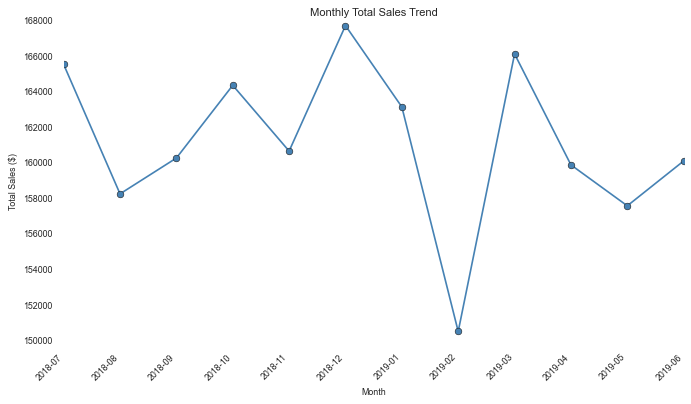

In [201]:
# Re-aggregating with unformatted values for plotting
plot_data = merged_df.groupby('transaction_month').agg({
    'total_sales': 'sum',
    'quantity': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(plot_data['transaction_month'], plot_data['total_sales'], color='steelblue', marker='o')
plt.title('Monthly Total Sales Trend', fontsize=10)
plt.xlabel('Month', fontsize=8)
plt.ylabel('Total Sales ($)', fontsize=8)

# Formatting aesthetics
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.savefig('monthly_sales_trend.png', bbox_inches='tight', dpi=300)
plt.show()


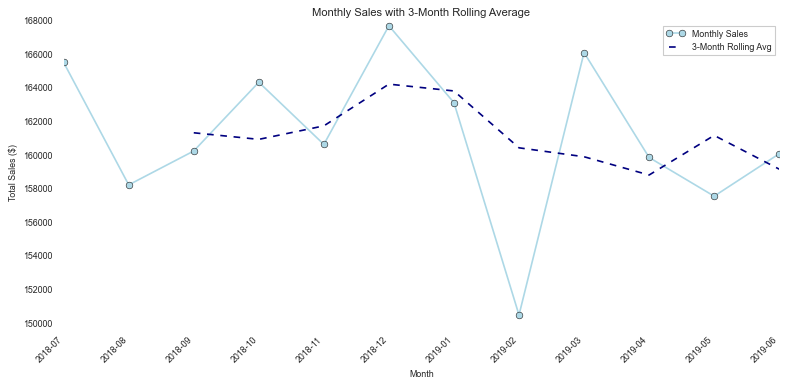

In [200]:
# Adding rolling average for smoother trend visualization
plot_data['Rolling Avg (3 Months)'] = plot_data['total_sales'].rolling(window=3).mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(plot_data['transaction_month'], plot_data['total_sales'], label='Monthly Sales', color='lightblue', marker='o')
plt.plot(plot_data['transaction_month'], plot_data['Rolling Avg (3 Months)'], label='3-Month Rolling Avg', color='navy', linestyle='--')

plt.title('Monthly Sales with 3-Month Rolling Average', fontsize=10)
plt.xlabel('Month', fontsize=8)
plt.ylabel('Total Sales ($)', fontsize=8)

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('monthly_sales_trend_with_rolling_avg.png', bbox_inches='tight', dpi=300)   
plt.show()


In [208]:
# Extracting the day of the week
merged_df['transaction_day'] = merged_df['transaction_date'].dt.day_name()

# Aggregating total sales per day
sales_by_day = (
    merged_df.groupby('transaction_day')['total_sales']
    .sum()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    .reset_index()
)

# Formatting total_sales with dollar sign and commas
sales_by_day['total_sales'] = sales_by_day['total_sales'].apply(lambda x: f"${x:,.2f}")

# Displaying results
sales_by_day.sort_values(by='total_sales', ascending=False, inplace=True)
sales_by_day



,transaction_day,total_sales
6,Sunday,"$283,276.45"
4,Friday,"$279,365.70"
2,Wednesday,"$277,849.25"
5,Saturday,"$275,650.50"
0,Monday,"$274,923.45"
3,Thursday,"$272,981.80"
1,Tuesday,"$270,361.85"


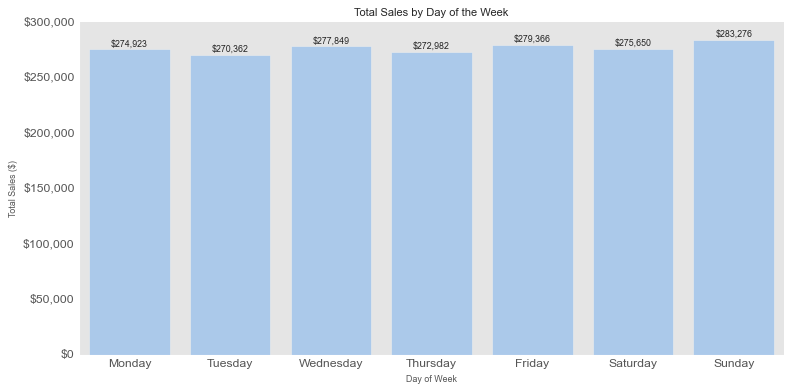

In [215]:
# Re-aggregating without formatting for plotting
raw_sales_by_day = (
    merged_df.groupby('transaction_day')['total_sales']
    .sum()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    .reset_index()
)

# Chart
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style for a professional aesthetic
plt.style.use('ggplot')
sns.set_palette('pastel')

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=raw_sales_by_day, x='transaction_day', y='total_sales')
plt.title('Total Sales by Day of the Week', fontsize=10)
plt.xlabel('Day of Week', fontsize=8)
plt.ylabel('Total Sales ($)', fontsize=8)

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=8)

# Remove gridlines and spines
plt.grid(False)
sns.despine()

# Format y-axis with dollar formatting
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
#plt.savefig('total_sales_by_day_of_week_bar.png', bbox_inches='tight', dpi=300)
plt.show()

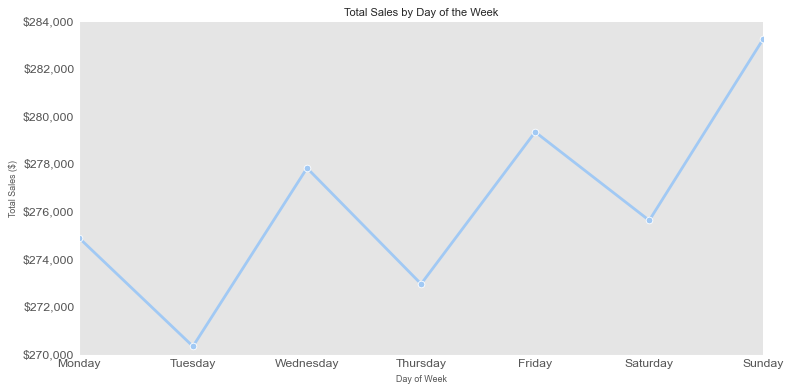

In [212]:
# Re-aggregating without formatting for plotting
raw_sales_by_day = (
    merged_df.groupby('transaction_day')['total_sales']
    .sum()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    .reset_index()
)

# Plot style for a professional aesthetic
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.style.use('ggplot')
sns.set_palette('pastel')

# Creating the line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=raw_sales_by_day, x='transaction_day', y='total_sales', marker='o', linewidth=2.5)

# Title and labels
plt.title('Total Sales by Day of the Week', fontsize=10)
plt.xlabel('Day of Week', fontsize=8)
plt.ylabel('Total Sales ($)', fontsize=8)

# Remove gridlines and spines
plt.grid(False)
sns.despine()

# Format y-axis with dollar formatting
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Layout
plt.tight_layout()
plt.savefig('total_sales_by_day_of_week.png', bbox_inches='tight', dpi=300)
plt.show()


In [213]:
# Creating weekday/weekend flag
merged_df['day_type'] = merged_df['transaction_date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Aggregating
week_summary = (
    merged_df.groupby('day_type')['total_sales']
    .sum()
    .reset_index()
)

# Formatting
week_summary['total_sales'] = week_summary['total_sales'].apply(lambda x: f"${x:,.2f}")
week_summary


,day_type,total_sales
0,Weekday,"$1,375,482.05"
1,Weekend,"$558,926.95"


- Findings :

The time-series trend analysis reveals insightful patterns in consumer purchasing behavior. Sales peaked on **Sundays (\$283,276.45)** and **Fridays (\$279,365.70)**, indicating heightened consumer activity heading into and during the weekend. Mid-week days like **Wednesday (\$277,849.25)** also saw strong performance, while **Tuesday (\$270,361.85)** recorded the lowest sales, suggesting a mid-week dip in engagement. A broader view across months from **July 2018 to April 2019** shows a relatively stable sales trend, with **December 2018** achieving the highest monthly revenue at **\$167,741.00**, likely driven by seasonal purchasing behavior. In terms of overall performance by day type, **weekdays significantly outperformed weekends**, generating **\$1,375,482.05** compared to **\$558,926.95**, reinforcing the importance of weekday promotions and inventory optimization. These insights are vital for refining marketing strategies, resource allocation, and campaign timing across the calendar.


.....

....

## 🧾 Final Report: Customer and Product Insights on Chip Purchasing Behavior

### 🗂 Project Overview

This analysis provides data-driven insights into customer behavior and purchasing patterns for a chip brand. Utilizing transaction-level data and customer segmentation, we explored four key analytical pillars: **Customer Segmentation**, **Product-Level Insights**, **Basket Size & Frequency**, and **Time-Series Trend Analysis**. The findings serve to inform category managers and marketing strategists on how best to optimize pricing, promotions, inventory planning, and customer targeting.

---

### 1. 👥 **Customer Segmentation Insights**

The customer base was segmented by **Lifestage** (e.g., "Young Singles/Couples", "Older Families") and **Customer Type** (Budget, Mainstream, Premium). Key findings include:

* **Older Families – Budget** emerged as the top-spending segment, contributing over **\$168,000** in total sales, followed closely by **Young Singles/Couples – Mainstream** and **Retirees – Mainstream**, highlighting a strong purchasing power across age brackets.
* **Premium customers** made fewer transactions but had a higher **average spend per transaction**, reflecting premium product preference and higher per-unit pricing.
* Segments like **Young Families – Budget** and **Older Singles – Budget** showed consistent purchase frequency, suggesting habitual consumption.

---

### 2. 📦 **Product-Level Insights**

Combining product metrics with customer segments revealed:

* Products like **"Natural Chip Compny SeaSalt175g"** and **"Smiths Crinkle Cut Chips Chicken 170g"** were the highest contributors to total revenue.
* Segments such as **Mainstream Retirees** and **Budget Older Families** consistently favored these top-selling SKUs, signaling strong product-segment affinity.
* A heatmap showed sales concentrations were highest among **Mainstream & Budget** segments across most lifestages, highlighting key opportunities for targeted promotions.
* The **average sales per transaction** for premium products remained elevated across all segments, affirming that value-driven shoppers still contribute to premium SKU sales.

---

### 3. 🛒 **Basket Size & Frequency**

Basket size and purchase frequency insights include:

* **Young Singles/Couples – Premium** had the highest **average basket value**, exceeding **\$7.90** per transaction, reflecting their willingness to spend more per visit.
* In contrast, **Budget customers** had higher transaction frequency but lower per-transaction values, suggesting bulk-buying or value hunting.
* Analysis of individual customer transactions revealed top spenders had more than **12 transactions each**, with consistent average spend ranging between **\$6.00 to \$7.50**, reinforcing the presence of loyal repeat customers.

---

### 4. 📆 **Time-Series Trend Analysis**

Time-based patterns revealed crucial sales timing insights:

* **Sunday** recorded the highest single-day revenue (**\$283,276.45**), followed closely by **Friday** and **Wednesday**, pointing to strong end-of-week and mid-week shopping activity.
* On a monthly scale, **December 2018** had the highest total sales (**\$167,741.00**), aligning with festive season purchasing behavior.
* **Weekdays significantly outperformed weekends**, generating **\$1.37M** in revenue compared to **\$558K** on weekends. This suggests the majority of customer engagement occurs during the workweek, possibly influenced by routine-driven purchases or workplace snacking habits.

---

### ✅ Strategic Recommendations

Based on these findings:

* **Target Older Families and Retirees in Budget and Mainstream segments** with value-oriented promotional bundles of best-selling products.
* **Leverage high-spending premium customers** with loyalty programs or exclusive deals that increase retention.
* **Schedule major promotions and new product launches mid-week to Friday**, when customer engagement peaks.
* **Optimize inventory and supply chain management for December and early-year months** where sales volume peaks.

---

### 📌 Conclusion

This project delivered a comprehensive, data-backed perspective on customer and product dynamics in the chips category. By combining segmentation, behavioral metrics, and time-trend analytics, the insights lay a solid foundation for data-driven strategic decision-making across marketing, operations, and product development.